# Proyek Akhir Insurance Customer Data -- Oleh Kelompok You model.unfit()

Anggota Kelompok:<br>
1. Fikri Budianto (2206025306) <br>
2. Khansa Mahira (2206819413) <br>
3. Dian Fathur Rahman (2206082096) <br>
4. Gilang Fajar Pratama (2206082631)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

file_id = "10PSvBsJR00Y_GcS3qpun84Wcbw6hy7KJ"
url = f"https://drive.google.com/uc?id={file_id}"

df = pd.read_csv(url)

In [ ]:
df.head()

,ID,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MonthlyIncome,Attrition
0,S1,28,Travel_Rarely,Research & Development,4,NaN,Other,Very High,Male,High,...,0,NaN,4,Good,4.0,1,0.0,NaN,14115.06,No
1,S2,25,Travel_Frequently,Sales,14,Below College,Marketing,High,Male,High,...,0,6.0,2,Good,NaN,4,1.0,4.0,16661.93,Yes
2,S3,36,Travel_Rarely,Research & Development,3,Below College,Marketing,Medium,Male,Medium,...,1,10.0,3,Bad,9.0,4,1.0,4.0,13178.42,No
3,S4,36,Travel_Frequently,Research & Development,4,NaN,Life Sciences,Very High,Male,High,...,3,18.0,3,Better,4.0,2,0.0,2.0,13601.03,No
4,S5,38,Travel_Frequently,Research & Development,12,Bachelor,Life Sciences,Very High,Male,Medium,...,0,NaN,4,Good,NaN,3,1.0,3.0,15419.15,No


Membaca file CSV dan memuatnya ke dalam DataFrame bernama df dan menampilkan 5 baris pertama dari DataFrame untuk mengecek isi data.

### Tipe fitur kategorikal atau numerik

In [ ]:
# Get categorical cols
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Categorical cols:")
print(categorical_cols)

# Get numerical cols (should use 'number' instead)
numerical_cols = df.select_dtypes(include=['number']).columns
print("\nNumerical cols:")
print(numerical_cols)

Categorical cols:
Index(['ID', 'BusinessTravel', 'Department', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'OverTime', 'PerformanceRating',
       'RelationshipSatisfaction', 'WorkLifeBalance', 'Attrition'],
      dtype='object')

Numerical cols:
Index(['Age', 'DistanceFromHome', 'JobLevel', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'MonthlyIncome'],
      dtype='object')


Membagi dataframe berdasarkan tipe data numerikal dan kategorikal.

# EDA

## 1. Apakah karyawan yang tidak sering pindah kerja mendapatkan gaji lebih tinggi dibandingkan dengan sering berpindah-pindah kerja? (Dian Fathur Rahman - 2206082096)

<ipython-input-4-ab8e1619e364>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='BusinessTravel', y='MonthlyIncome', data=df, palette="Set2")


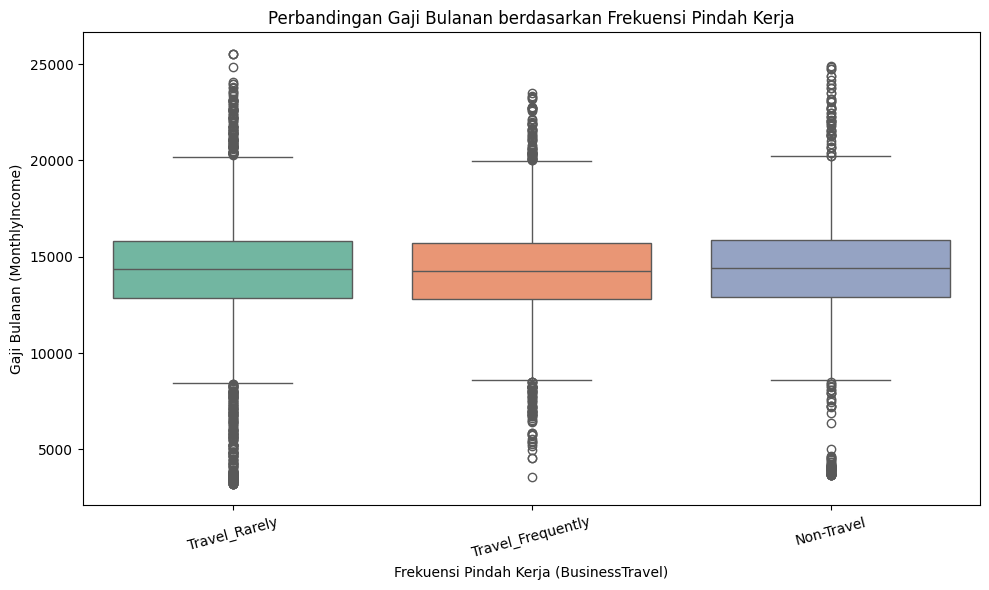

In [ ]:
# Visualisasi gaji berdasarkan frekuensi pindah kerja
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='BusinessTravel', y='MonthlyIncome', data=df, palette="Set2")
plt.title('Perbandingan Gaji Bulanan berdasarkan Frekuensi Pindah Kerja')
plt.xlabel('Frekuensi Pindah Kerja (BusinessTravel)')
plt.ylabel('Gaji Bulanan (MonthlyIncome)')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

<ipython-input-5-f64017e8c5c6>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
<ipython-input-5-f64017e8c5c6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


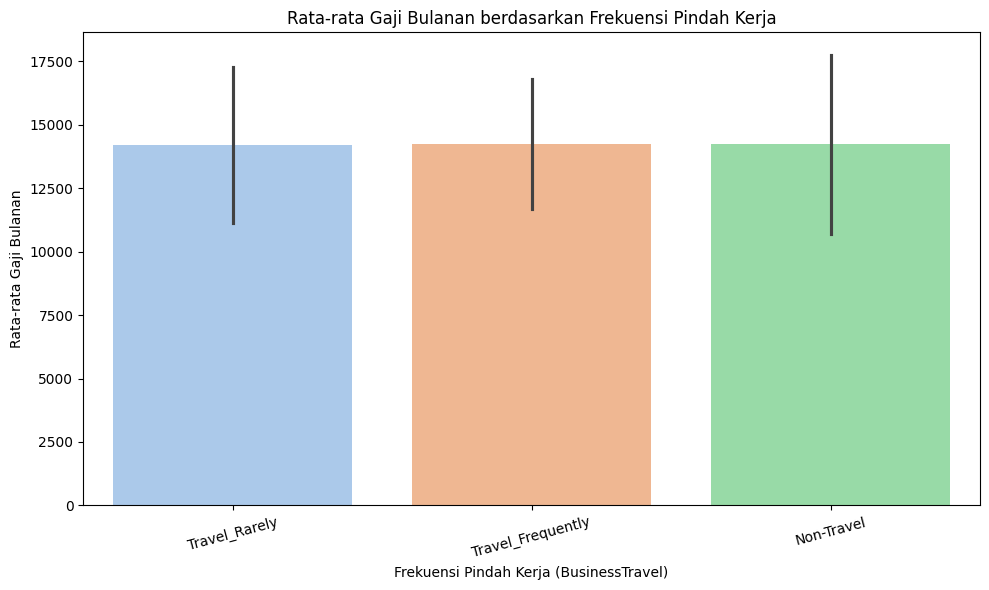

In [ ]:
# Barplot rata-rata gaji
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df,
    x='BusinessTravel',
    y='MonthlyIncome',
    estimator='mean',
    ci='sd',
    palette='pastel'
)

plt.title('Rata-rata Gaji Bulanan berdasarkan Frekuensi Pindah Kerja')
plt.xlabel('Frekuensi Pindah Kerja (BusinessTravel)')
plt.ylabel('Rata-rata Gaji Bulanan')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

Karyawan dengan kategori Travel_Rarely cenderung memiliki gaji lebih tinggi secara median dibandingkan dengan kategori Travel_Frequently.

Karyawan yang tidak sering pindah kerja (Travel_Rarely atau Non-Travel) memang cenderung memiliki gaji bulanan yang lebih tinggi dibandingkan yang sering berpindah-pindah kerja (Travel_Frequently).

## 2. Apakah karyawan yang bekerja secara overtime memiliki performance yang baik? (Gilang Fajar Pratama - 2206082631)


Data Awal (head):
  OverTime PerformanceRating
0       No         Excellent
1       No         Excellent
2      Yes         Excellent
3       No         Excellent
4       No         Excellent

Tipe data dari kolom 'OverTime' dan 'PerformanceRating' (sebelum diubah):
OverTime             object
PerformanceRating    object
dtype: object

Tipe data dari kolom 'OverTime' dan 'PerformanceRating' (setelah diubah):
OverTime               object
PerformanceRating    category
dtype: object

Tabel Kontingensi (OverTime vs PerformanceRating):
PerformanceRating  Good  Excellent  Outstanding
OverTime                                       
No                  154       6929          382
Yes                  27       1308          278

Proporsi OverTime terhadap PerformanceRating (%):
PerformanceRating     Good  Excellent  Outstanding
OverTime                                          
No                 2.06296  92.819826     5.117214
Yes                1.67390  81.091135    17.234966


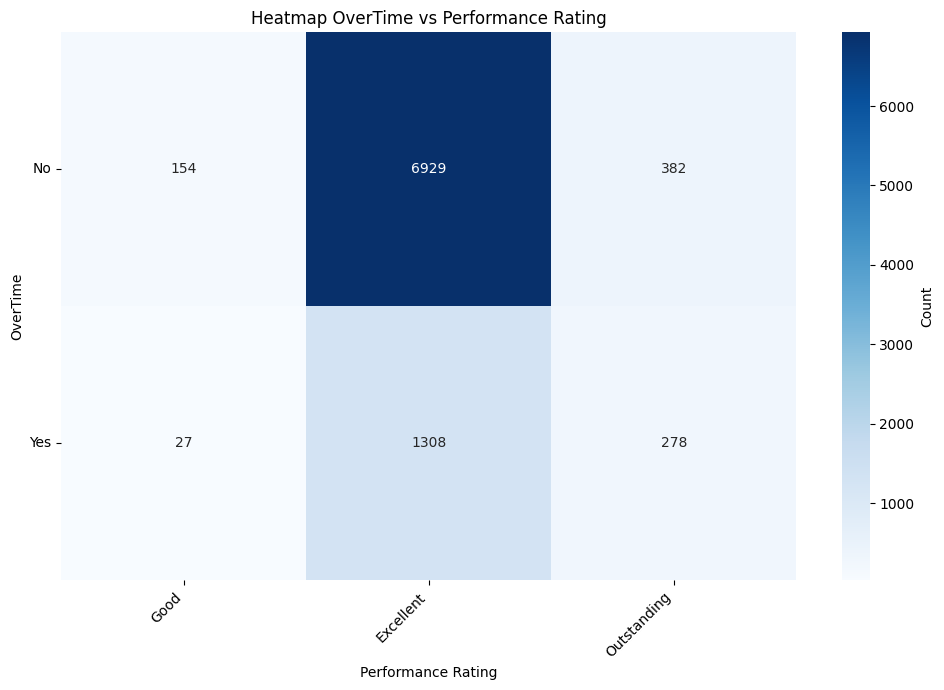

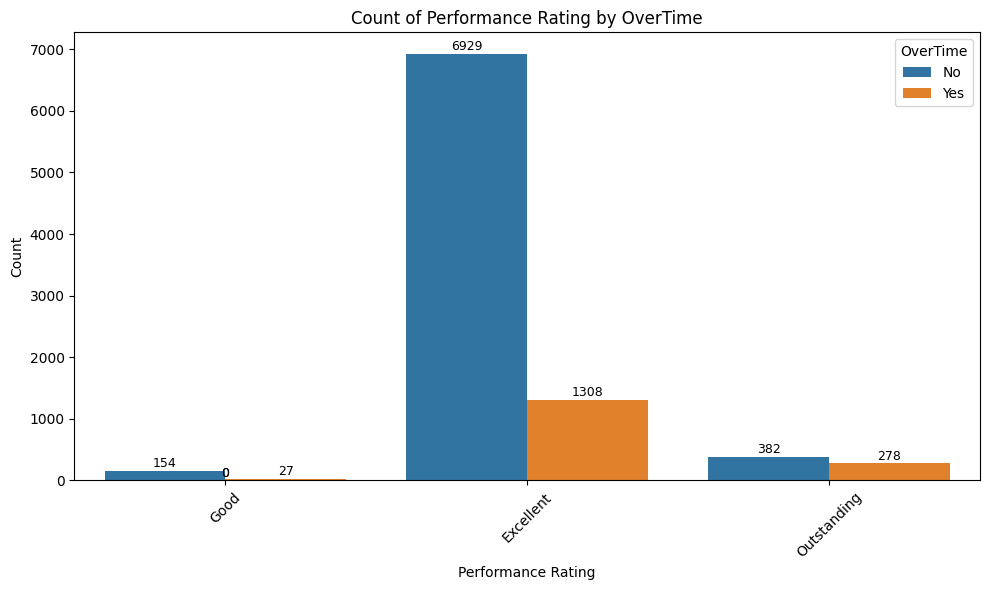

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import numpy as np # Untuk membuat data contoh

print("Data Awal (head):")
print(df[['OverTime', 'PerformanceRating']].head())

# Cek hubungan antara OverTime dan PerformanceRating
print("\nTipe data dari kolom 'OverTime' dan 'PerformanceRating' (sebelum diubah):")
print(df[['OverTime', 'PerformanceRating']].dtypes)

# --- KUNCI: Ubah 'PerformanceRating' menjadi tipe data Categorical dengan urutan yang diinginkan ---
performance_order = ['Good', 'Excellent', 'Outstanding']
df['PerformanceRating'] = pd.Categorical(
    df['PerformanceRating'],
    categories=performance_order,
    ordered=True
)

# Opsional: Jika Anda juga ingin urutan tertentu untuk 'OverTime' (misal 'Yes' lalu 'No')
# overtime_order = ['Yes', 'No']
# df['OverTime'] = pd.Categorical(df['OverTime'], categories=overtime_order, ordered=True)


print("\nTipe data dari kolom 'OverTime' dan 'PerformanceRating' (setelah diubah):")
print(df[['OverTime', 'PerformanceRating']].dtypes)


# 1. Buat Tabel Kontingensi
# pd.crosstab akan menghormati urutan kategori jika kolomnya bertipe Categorical ordered
contingency_table_overtime = pd.crosstab(df['OverTime'], df['PerformanceRating'])

# Cek kolom dari tabel kontingensi
print("\nTabel Kontingensi (OverTime vs PerformanceRating):")
print(contingency_table_overtime) # Sekarang kolom harusnya Good, Excellent, Outstanding

# Hitung proporsi (persentase baris)
# Ini akan menggunakan contingency_table_overtime dengan kolom yang sudah terurut
prop_table = contingency_table_overtime.apply(lambda x: x/x.sum()*100, axis=1)
print("\nProporsi OverTime terhadap PerformanceRating (%):")
print(prop_table)

# 2. Visualisasi dengan Heatmap
plt.figure(figsize=(10, 7)) # Ukuran disesuaikan agar label muat
sns.heatmap(contingency_table_overtime, annot=True, fmt="d", cmap="Blues", cbar_kws={'label': 'Count'})
plt.title('Heatmap OverTime vs Performance Rating')
plt.ylabel('OverTime')
plt.xlabel('Performance Rating')
plt.xticks(rotation=45, ha='right') # Rotasi label x-axis jika panjang
plt.yticks(rotation=0)
plt.tight_layout() # Menyesuaikan layout agar tidak terpotong
plt.show()

# Visualisasi dengan bar plot dengan angka di atas bar
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='PerformanceRating', hue='OverTime', order=performance_order) # Store the Axes object
plt.title('Count of Performance Rating by OverTime')
plt.xlabel('Performance Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='OverTime')

# Add annotations (numbers on top of bars)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Get the height of the bar
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position for the text
                ha='center', va='center',  # Alignment
                xytext=(0, 5),  # Offset the text slightly above the bar
                textcoords='offset points',
                fontsize=9)

plt.tight_layout()
plt.show()

Terdapat pengaruh overtime terhadap performance. Pekerja yang memiliki performance yang baik adalah pekerja yang bekerja tidak overtime

## 3. Apa ciri-ciri dari karyawan yang memiliki income tinggi? (Khansa Mahira - 2206819413)

In [ ]:
df_eda = df.copy()

### Describe

In [ ]:
print(df_eda['MonthlyIncome'].value_counts(), '\n')

MonthlyIncome
17899.28    5
13854.52    4
15920.07    4
14080.57    4
13540.04    4
           ..
16661.93    1
13178.42    1
17309.37    1
14998.98    1
8951.09     1
Name: count, Length: 7636, dtype: int64 



In [ ]:
df_eda['MonthlyIncome'].describe()

,MonthlyIncome
count,9078.000000
mean,14213.461360
std,2984.634565
min,3206.160000
25%,12871.332500
50%,14321.610000
75%,15786.557500
max,25535.330000


In [ ]:
kolom_numerik = ['Age', 'DistanceFromHome', 'JobLevel', 'NumCompaniesWorked',
                  'PercentSalaryHike', 'StandardHours', 'StockOptionLevel',
                  'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
                  'YearsInCurrentRole', 'YearsSinceLastPromotion',
                  'YearsWithCurrManager', 'MonthlyIncome']

In [ ]:
def plot_boxplots(numerical_cols, df):
    """
    Create box plots for the specified numerical columns in the given DataFrame.
    Parameters:
    numerical_cols (list): List of numerical column names to plot.
    df (DataFrame): The DataFrame containing the data.
    """
    # Create a figure with a specified size
    plt.figure(figsize=(15, 15))  # Adjust the size as needed

    # Loop through each numerical column and create a box plot
    for i, col in enumerate(numerical_cols):
        # Create a subplot for each box plot
        plt.subplot(5, 3, i + 1)

        # Create the box plot using seaborn
        sns.boxplot(y=df[col], color='skyblue')

        # Set the title for the subplot
        plt.title(f'Box Plot of {col}', fontsize=12)

        # Add a label for the y-axis
        plt.ylabel(col, fontsize=10)

        # Remove x-axis ticks and labels as they are not needed for single-column box plots
        plt.xticks([])

    # Adjust layout to prevent titles and labels from overlapping
    plt.tight_layout()

    # Display the plots
    plt.show()

### Menentukan high income merupakan dataset dengan MonthlyIncome lebih dari atau sama dengan Q3

In [ ]:
Q3_monthly_income = df_eda['MonthlyIncome'].quantile(0.75)
print(f"Kuartil Ketiga (Q3) untuk MonthlyIncome: {Q3_monthly_income}\n")

Kuartil Ketiga (Q3) untuk MonthlyIncome: 15786.557499999999



In [ ]:
high_income_df = df_eda[df_eda['MonthlyIncome'] >= Q3_monthly_income].copy()
other_income_df = df_eda[df_eda['MonthlyIncome'] < Q3_monthly_income].copy()

print(f"Jumlah karyawan berpenghasilan tinggi (>= Q3): {len(high_income_df)}")
print(f"Jumlah karyawan berpenghasilan lainnya (kurang dari Q3): {len(other_income_df)}\n")

Jumlah karyawan berpenghasilan tinggi (>= Q3): 2270
Jumlah karyawan berpenghasilan lainnya (kurang dari Q3): 6808



### Analisis Fitur Numerik

In [ ]:
print("\nPERBANDINGAN STATISTIK DESKRIPTIF (FITUR NUMERIK):")
print("Karyawan Berpenghasilan Tinggi (MonthlyIncome >= Q3):")
print(high_income_df[kolom_numerik].describe().loc[['mean', 'std', 'min', 'max', '50%', '75%']]) # Include median and Q3 for better comparison
print("\nKaryawan Berpenghasilan Lainnya (MonthlyIncome < Q3):")
print(other_income_df[kolom_numerik].describe().loc[['mean', 'std', 'min', 'max', '50%', '75%']])


PERBANDINGAN STATISTIK DESKRIPTIF (FITUR NUMERIK):
Karyawan Berpenghasilan Tinggi (MonthlyIncome >= Q3):
            Age  DistanceFromHome  JobLevel  NumCompaniesWorked  \
mean  35.305286          9.450661  1.838767            2.381938   
std    9.375085          7.204559  0.961807            2.265718   
min    4.000000        -11.000000  0.000000           -2.000000   
max   68.000000         36.000000  5.000000           11.000000   
50%   33.000000          8.000000  2.000000            1.500000   
75%   39.000000         14.000000  2.000000            4.000000   

      PercentSalaryHike  StandardHours  StockOptionLevel  TotalWorkingYears  \
mean          15.429977           80.0          0.380617           9.562283   
std            3.455656            0.0          0.639919           7.305299   
min            7.000000           80.0         -1.000000          -2.000000   
max           27.000000           80.0          4.000000          42.000000   
50%           15.000000      

Box Plot untuk data pendapatan tinggi


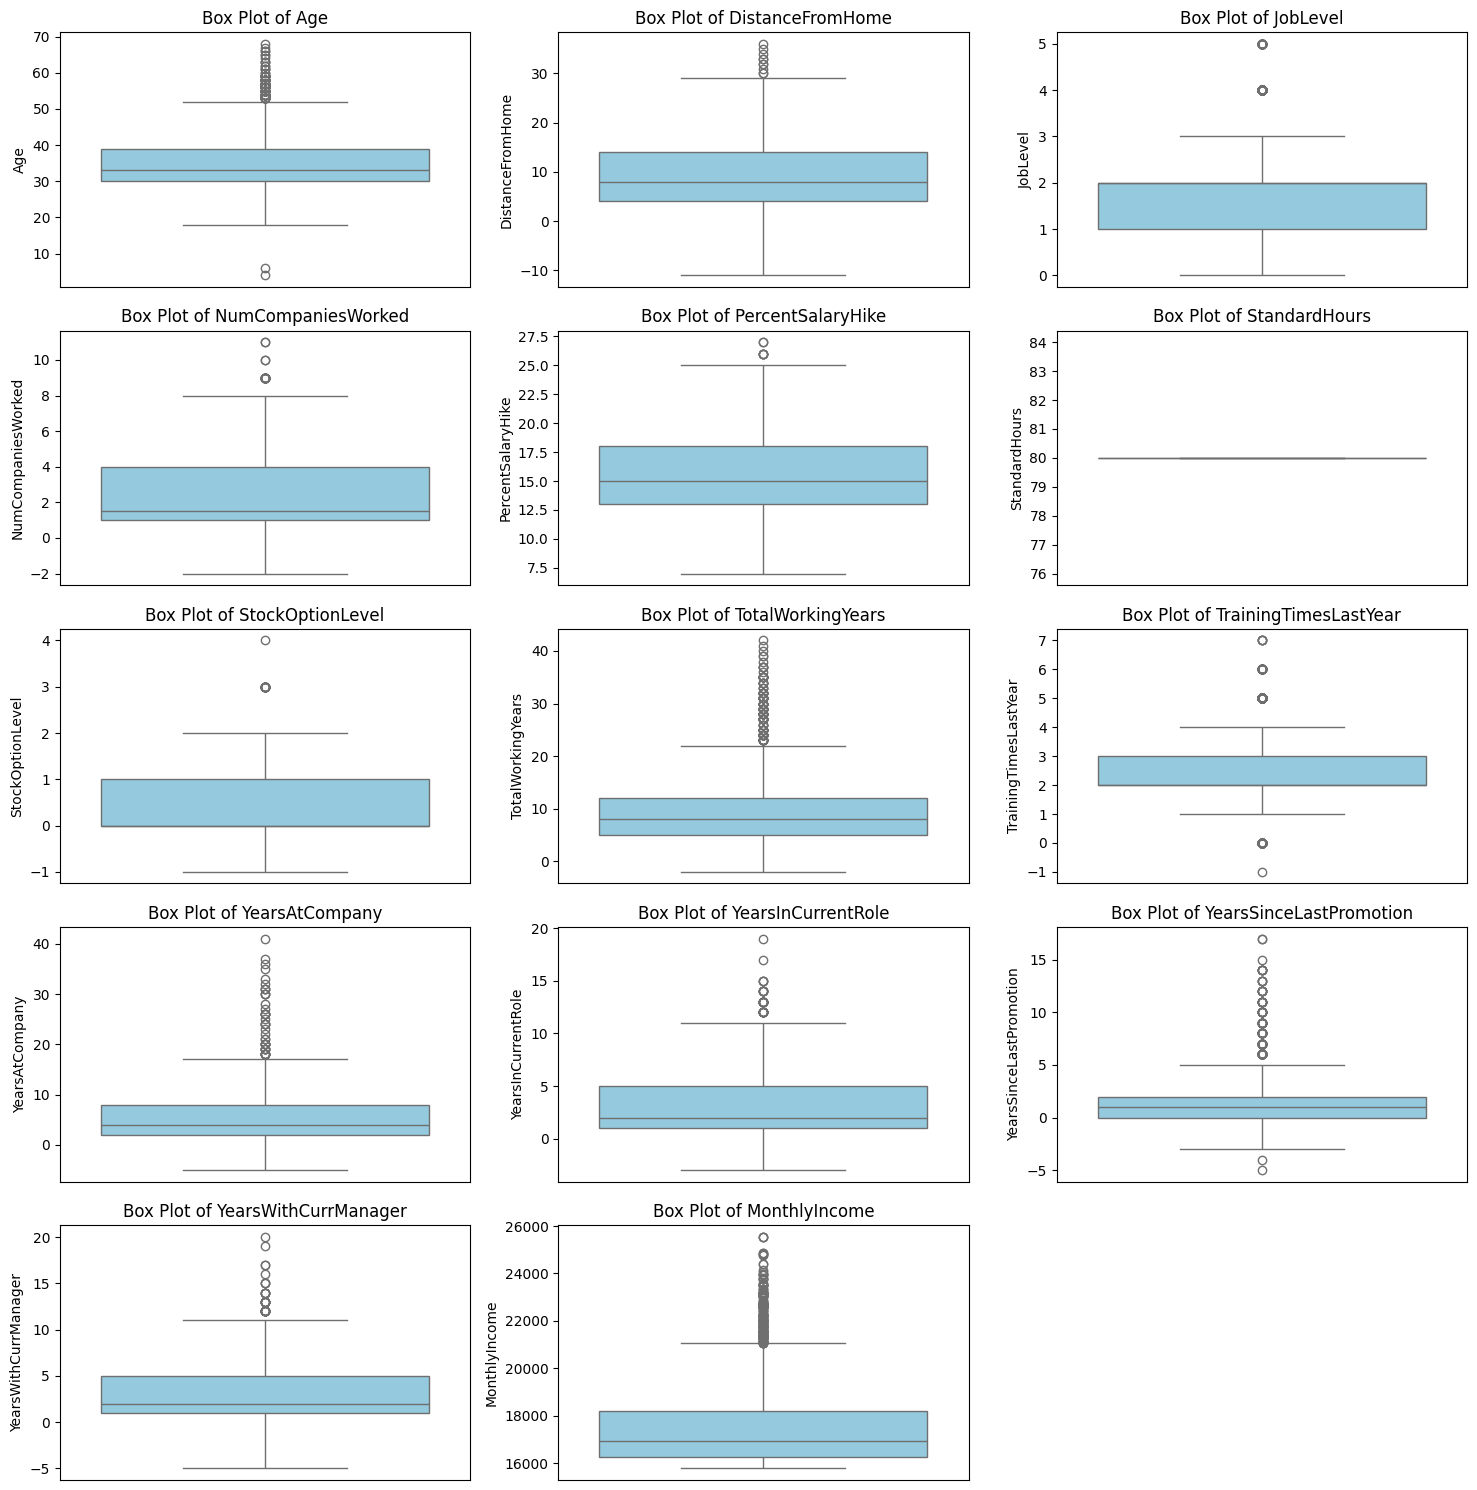

In [ ]:
print("Box Plot untuk data pendapatan tinggi")
plot_boxplots(kolom_numerik, high_income_df)

Box Plot untuk data pendapatan lain


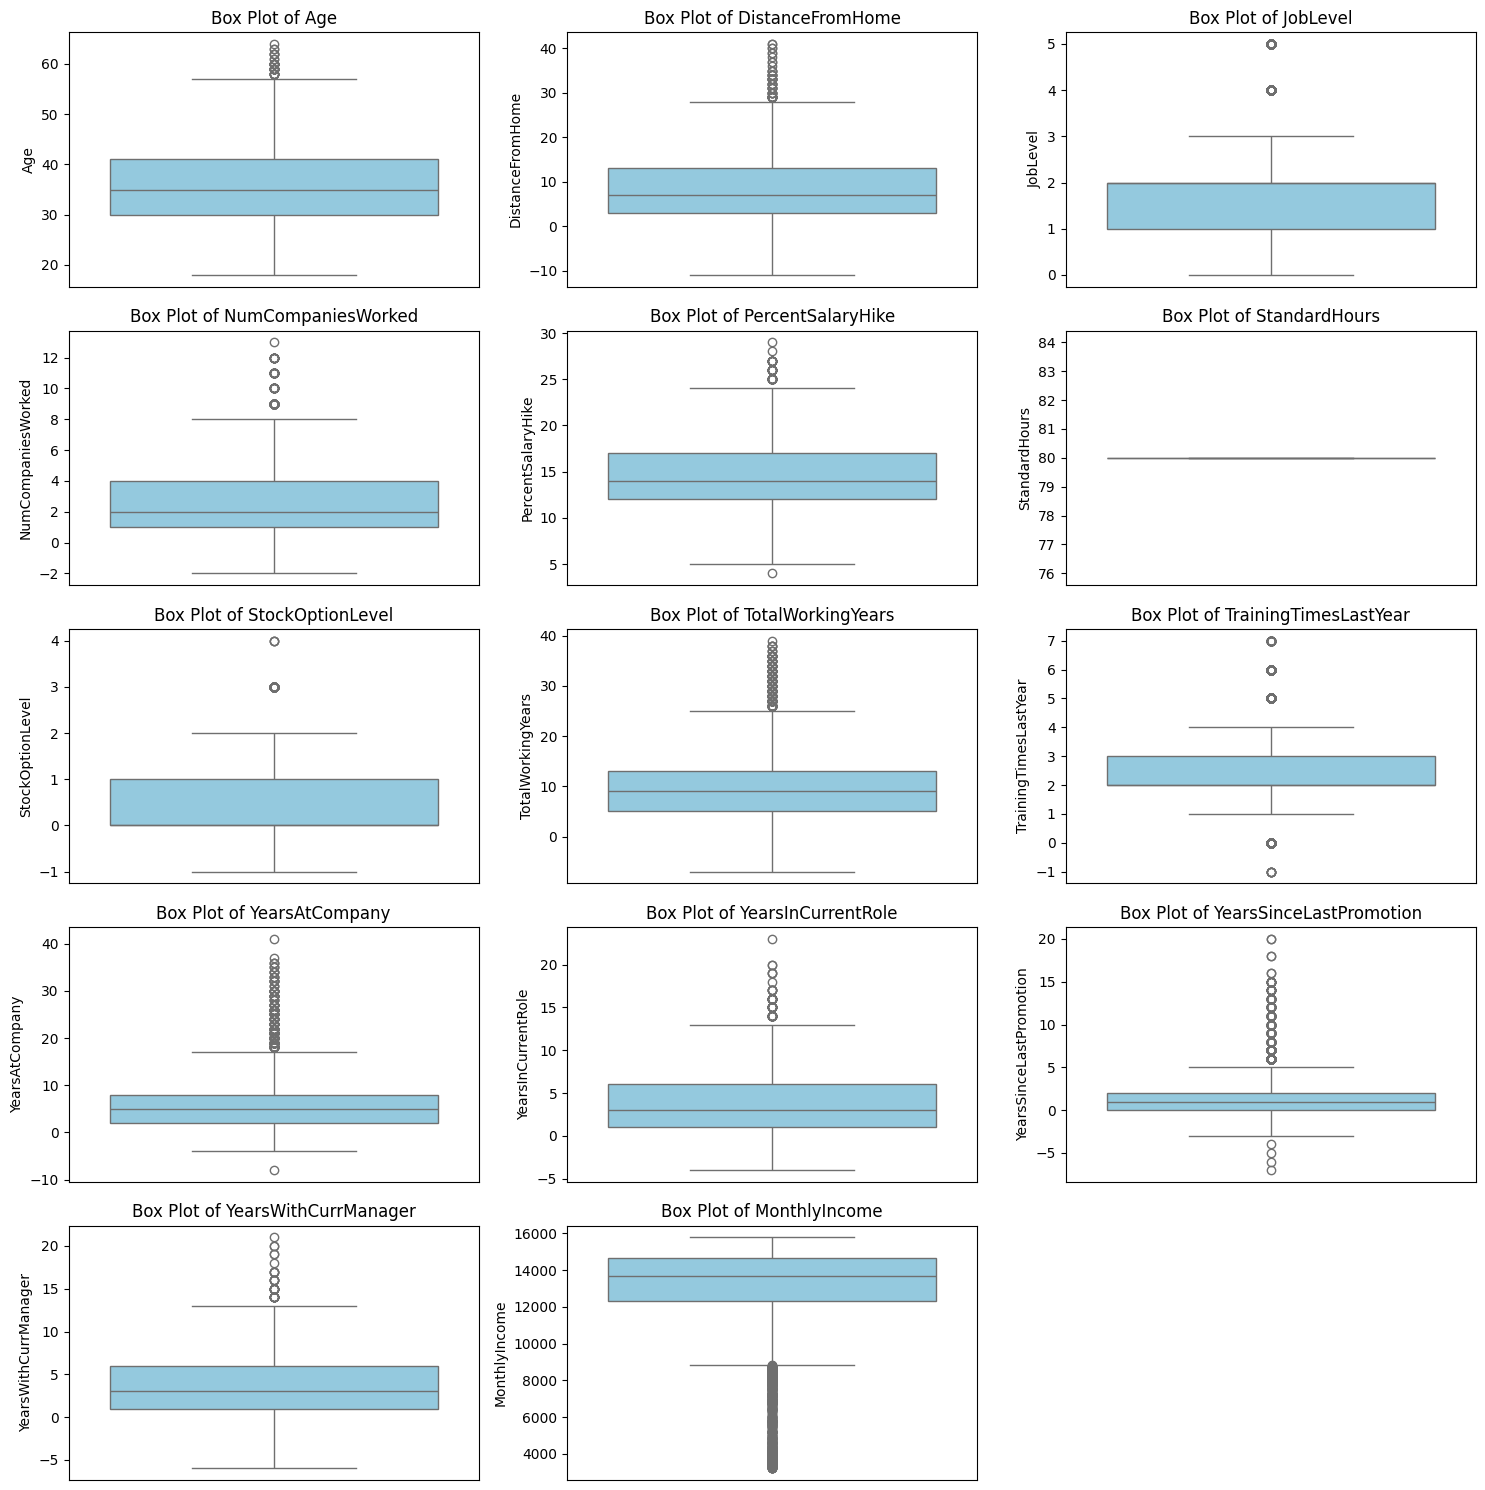

In [ ]:
print("Box Plot untuk data pendapatan lain")
plot_boxplots(kolom_numerik, other_income_df)


VISUALISASI DISTRIBUSI FITUR NUMERIK (HIGH INCOME vs. OTHER INCOME):


<ipython-input-15-81b74862b729>:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(high_income_df[col].dropna(), ax=axes[i], fill=True, label='High Income', color='skyblue')
<ipython-input-15-81b74862b729>:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(other_income_df[col].dropna(), ax=axes[i], fill=True, label='Other Income', color='lightcoral')
<ipython-input-15-81b74862b729>:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()


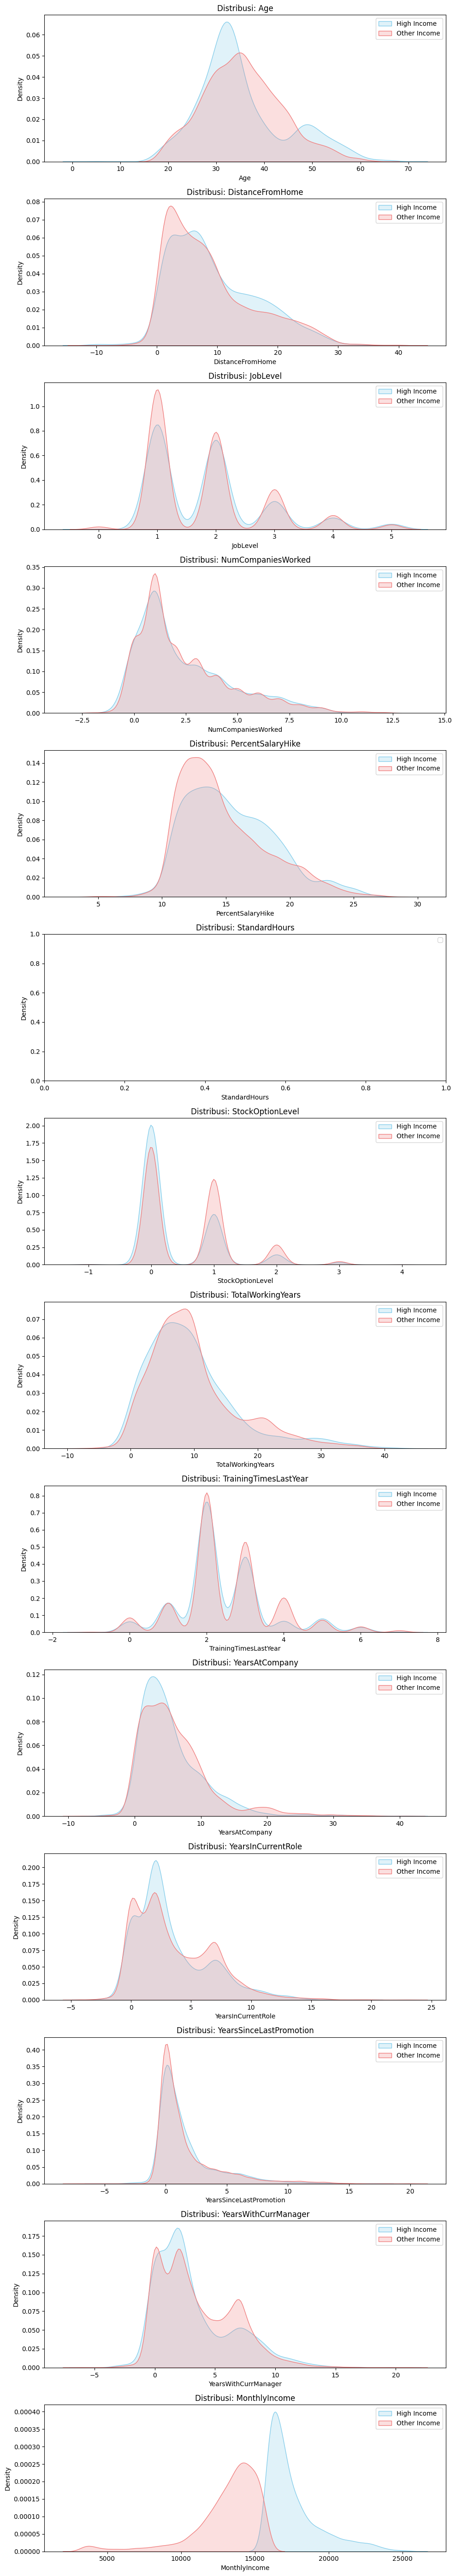

In [ ]:
# Visualisasi distribusi untuk fitur numerik (membandingkan high vs other income)
print("\nVISUALISASI DISTRIBUSI FITUR NUMERIK (HIGH INCOME vs. OTHER INCOME):")
fig, axes = plt.subplots(nrows=len(kolom_numerik), ncols=1, figsize=(10, 4 * len(numerical_cols)))
axes = axes.flatten() if len(kolom_numerik) > 1 else [axes]

for i, col in enumerate(kolom_numerik):
    sns.kdeplot(high_income_df[col].dropna(), ax=axes[i], fill=True, label='High Income', color='skyblue')
    sns.kdeplot(other_income_df[col].dropna(), ax=axes[i], fill=True, label='Other Income', color='lightcoral')
    axes[i].set_title(f'Distribusi: {col}')
    axes[i].legend()
plt.tight_layout()
plt.show()


PERBANDINGAN DISTRIBUSI FREKUENSI (Fitur Numerik):

--- Kolom: JobLevel ---
Karyawan Berpenghasilan Tinggi (%):
JobLevel
1    43.79
2    37.36
3    11.72
4     4.80
5     2.20
0     0.13
Name: proportion, dtype: float64

Karyawan Berpenghasilan Lainnya (%):
JobLevel
1    46.90
2    32.59
3    13.37
4     4.70
5     1.57
0     0.87
Name: proportion, dtype: float64


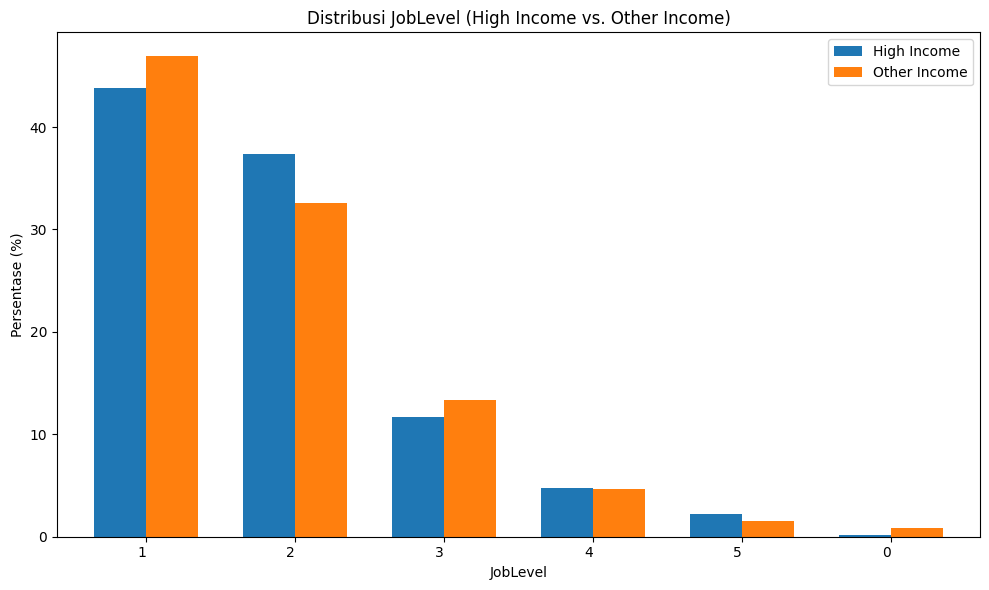


--- Kolom: StockOptionLevel ---
Karyawan Berpenghasilan Tinggi (%):
StockOptionLevel
 0    68.85
 1    24.89
 2     4.93
 3     1.10
-1     0.18
 4     0.04
Name: proportion, dtype: float64

Karyawan Berpenghasilan Lainnya (%):
StockOptionLevel
 0    51.98
 1    37.69
 2     8.77
 3     1.41
-1     0.10
 4     0.04
Name: proportion, dtype: float64


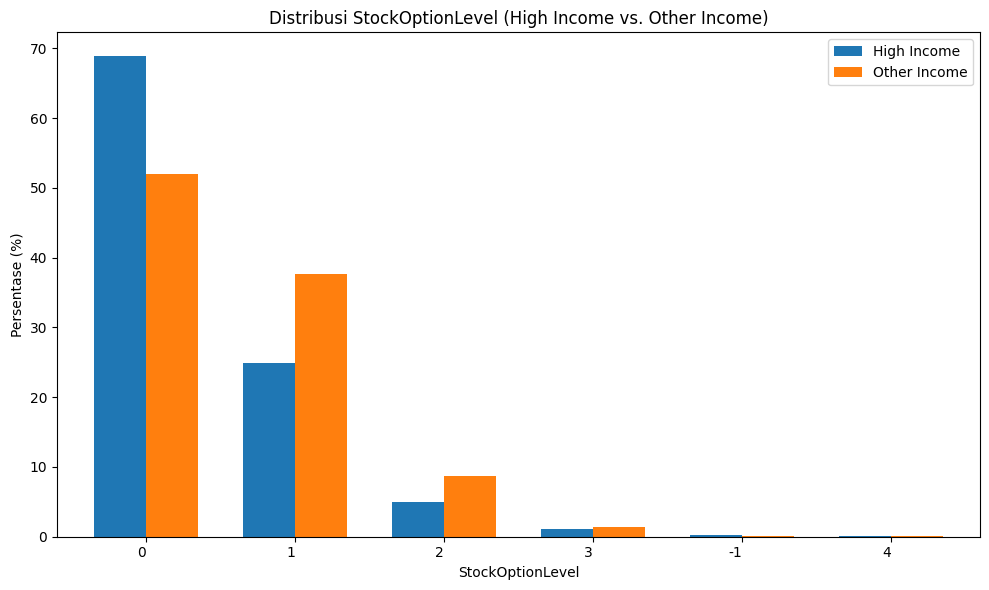


--- Kolom: TrainingTimesLastYear ---
Karyawan Berpenghasilan Tinggi (%):
TrainingTimesLastYear
 2    47.18
 3    27.22
 1    10.66
 5     4.93
 4     4.05
 0     3.88
 6     1.85
 7     0.18
-1     0.04
Name: proportion, dtype: float64

Karyawan Berpenghasilan Lainnya (%):
TrainingTimesLastYear
 2    42.45
 3    27.51
 4    10.52
 1     8.95
 0     4.45
 5     3.76
 6     1.72
 7     0.56
-1     0.09
Name: proportion, dtype: float64


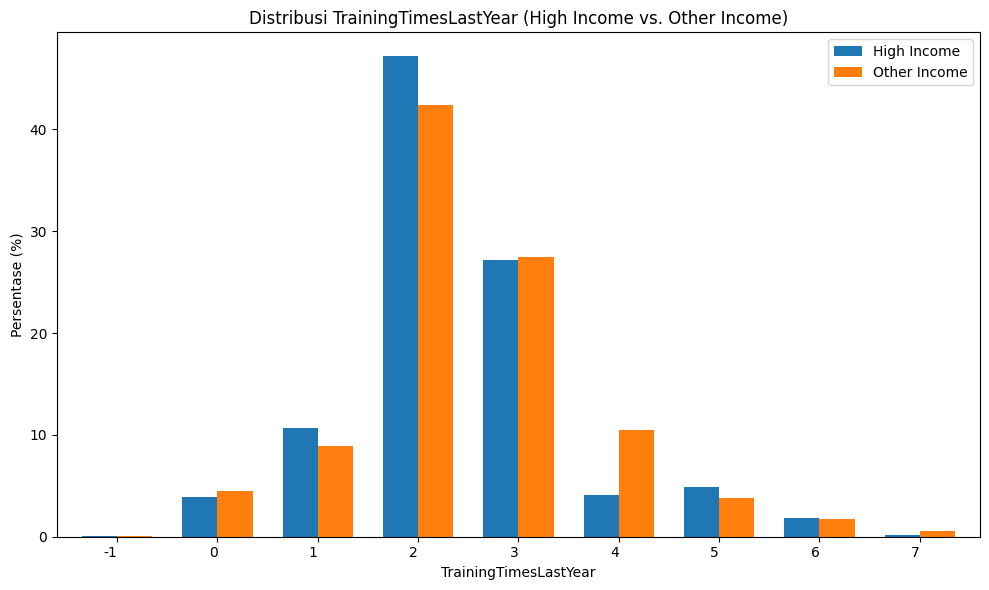

In [ ]:
print("\nPERBANDINGAN DISTRIBUSI FREKUENSI (Fitur Numerik):")
sub_numerical_cols = ['JobLevel', 'StockOptionLevel', 'TrainingTimesLastYear']
for col in sub_numerical_cols:
    print(f"\n--- Kolom: {col} ---")
    print("Karyawan Berpenghasilan Tinggi (%):")
    high_income_prop = high_income_df[col].value_counts(normalize=True).mul(100).round(2)
    print(high_income_prop)
    print("\nKaryawan Berpenghasilan Lainnya (%):")
    other_income_prop = other_income_df[col].value_counts(normalize=True).mul(100).round(2)
    print(other_income_prop)

    # Visualisasi perbandingan untuk fitur kategorikal kunci

    plt.figure(figsize=(10, 6))
    # Gabungkan data untuk plot perbandingan
    plot_df = pd.DataFrame({
        'High Income': high_income_prop,
        'Other Income': other_income_prop
    }).fillna(0) # Isi NaN dengan 0 jika kategori tidak ada di salah satu grup
    plot_df.plot(kind='bar', ax=plt.gca(), width=0.7)
    plt.title(f'Distribusi {col} (High Income vs. Other Income)')
    plt.ylabel('Persentase (%)')
    plt.xticks(rotation=0, ha='right')
    plt.tight_layout()
    plt.show()

Insight yang didapat dari disitribusi fitur numerik berdasarkan KDE Plot dan statistik deskriptif:
- Jarak dari rumah ke kantor (DistanceFromHome) karyawan dengan gaji lebih tinggi secara rata-rata lebih jauh dibanding dengan rata-rata DistanceFromHome karyawan yang berpenghasilan lebih rendah.
- Hal yang sama juga terjadi pada atribut PercentSalaryHike (persentase kenaikan gaji terakhir) yang nilai rata-rata karyawan dengan High Income lebih tinggi disbanding dengan nilai rata-rata karyawan dengan pendapatan lebih rendah.

Insight yang didapat dari disitribusi fitur numerik berdasarkan bar chart:
- Karyawan dengan pendapatan lebih tinggi sering dijumpai berada pada tingkat jabatan (JobLevel) 2, 4, dan 5. Hal ini sangat logis karena tingkat jabatan yang lebih tinggi biasanya disertasi dengan tanggung jawab yang lebih besar dan pendapatan atau kompensasi yang lebih tinggi.
- Tingkat opsi saham yang diberikan ke karyawan dengan high income lebih sering pada StockOptionLevel 0.
- Jumlah pelatihan yang diikuti karyawan dalam setahun terakhir (TrainingTimesLastYear) lebih tinggi untuk pekerja high income paling tinggi ketika jumlah pelatihannya mencapai 2 kali, lalu diikuti dengan 1 kali, 5 kali, dan 6 kali.

### Analisis Fitur Kategorikal

PERBANDINGAN DISTRIBUSI FREKUENSI (FITUR KATEGORIKAL):

--- Kolom: ID ---
Karyawan Berpenghasilan Tinggi (%):
ID
S9078    0.04
S2       0.04
S6       0.04
S7       0.04
S19      0.04
         ... 
S66      0.04
S65      0.04
S58      0.04
S57      0.04
S53      0.04
Name: proportion, Length: 2270, dtype: float64

Karyawan Berpenghasilan Lainnya (%):
ID
S9075    0.01
S1       0.01
S3       0.01
S4       0.01
S5       0.01
         ... 
S16      0.01
S15      0.01
S14      0.01
S13      0.01
S12      0.01
Name: proportion, Length: 6808, dtype: float64


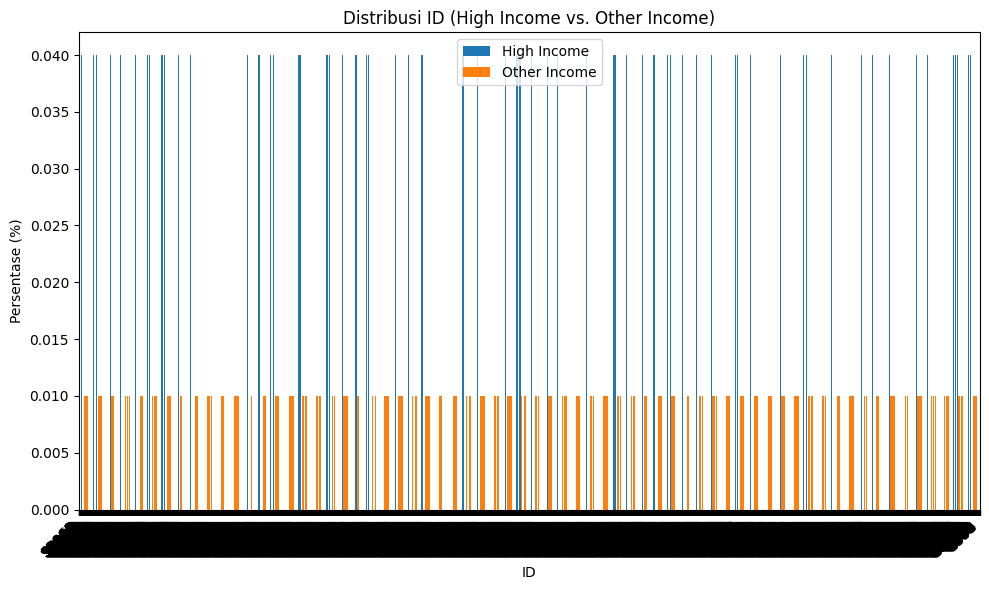


--- Kolom: BusinessTravel ---
Karyawan Berpenghasilan Tinggi (%):
BusinessTravel
Travel_Rarely        55.95
Travel_Frequently    30.84
Non-Travel           13.22
Name: proportion, dtype: float64

Karyawan Berpenghasilan Lainnya (%):
BusinessTravel
Travel_Rarely        54.52
Travel_Frequently    32.93
Non-Travel           12.54
Name: proportion, dtype: float64


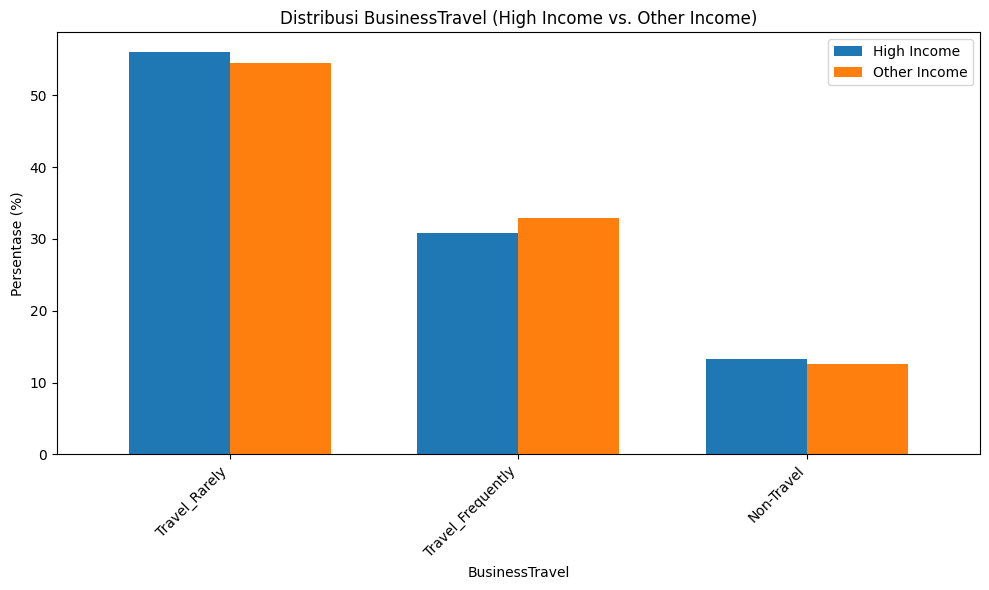


--- Kolom: Department ---
Karyawan Berpenghasilan Tinggi (%):
Department
Research & Development    75.09
Sales                     18.23
Human Resources            6.68
Name: proportion, dtype: float64

Karyawan Berpenghasilan Lainnya (%):
Department
Research & Development    72.60
Sales                     17.72
Human Resources            9.68
Name: proportion, dtype: float64


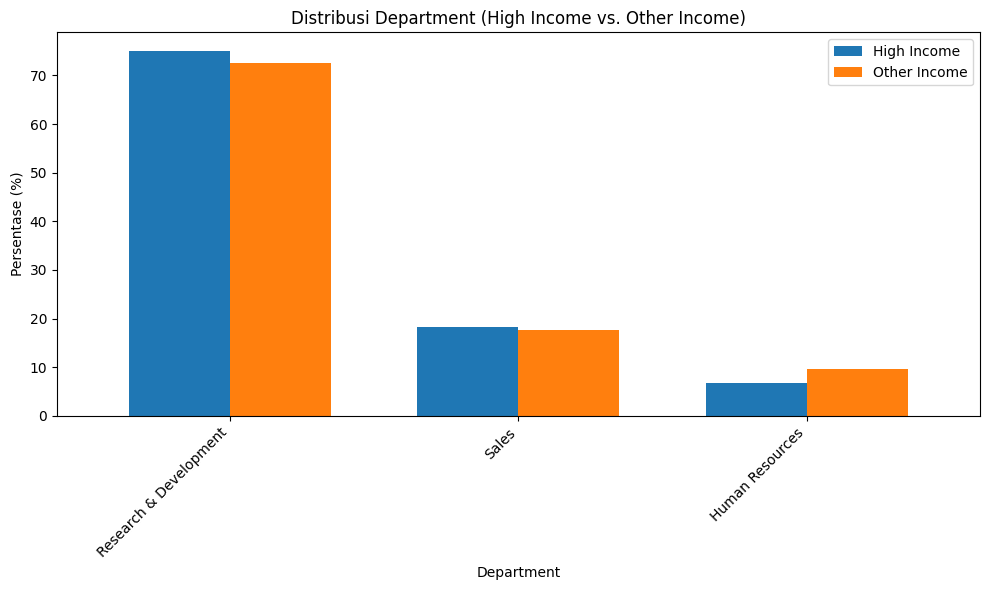


--- Kolom: Education ---
Karyawan Berpenghasilan Tinggi (%):
Education
Bachelor         47.46
College          23.59
Master           14.42
Below College    13.48
Doctor            1.05
Name: proportion, dtype: float64

Karyawan Berpenghasilan Lainnya (%):
Education
Bachelor         42.38
College          28.32
Master           14.37
Below College    14.09
Doctor            0.84
Name: proportion, dtype: float64


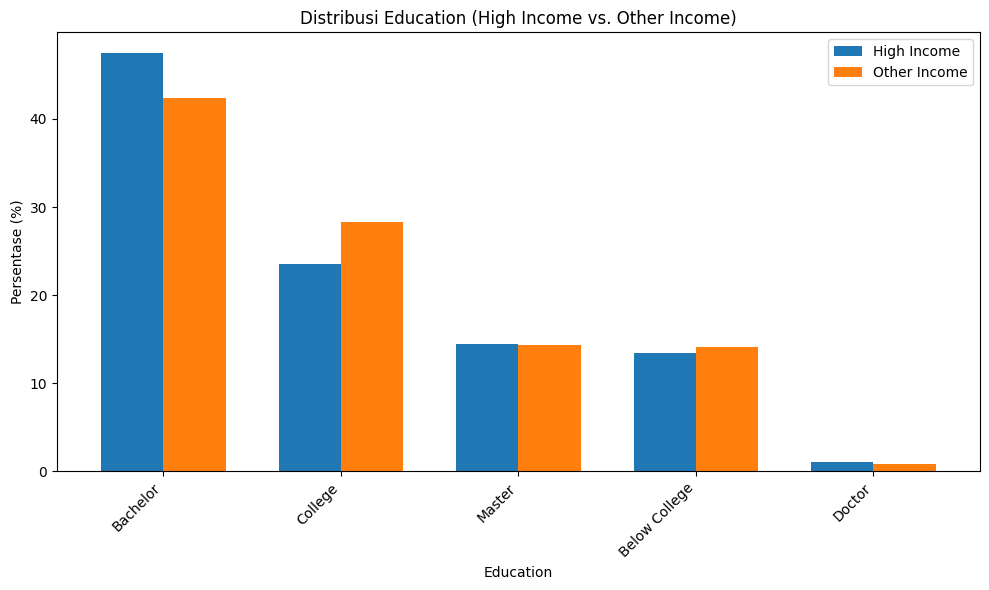


--- Kolom: EducationField ---
Karyawan Berpenghasilan Tinggi (%):
EducationField
Life Sciences       42.25
Marketing           24.54
Medical             24.39
Human Resources      4.32
Other                4.16
Technical Degree     0.35
Name: proportion, dtype: float64

Karyawan Berpenghasilan Lainnya (%):
EducationField
Life Sciences       38.20
Medical             22.61
Marketing           20.55
Other                8.22
Human Resources      5.38
Technical Degree     5.03
Name: proportion, dtype: float64


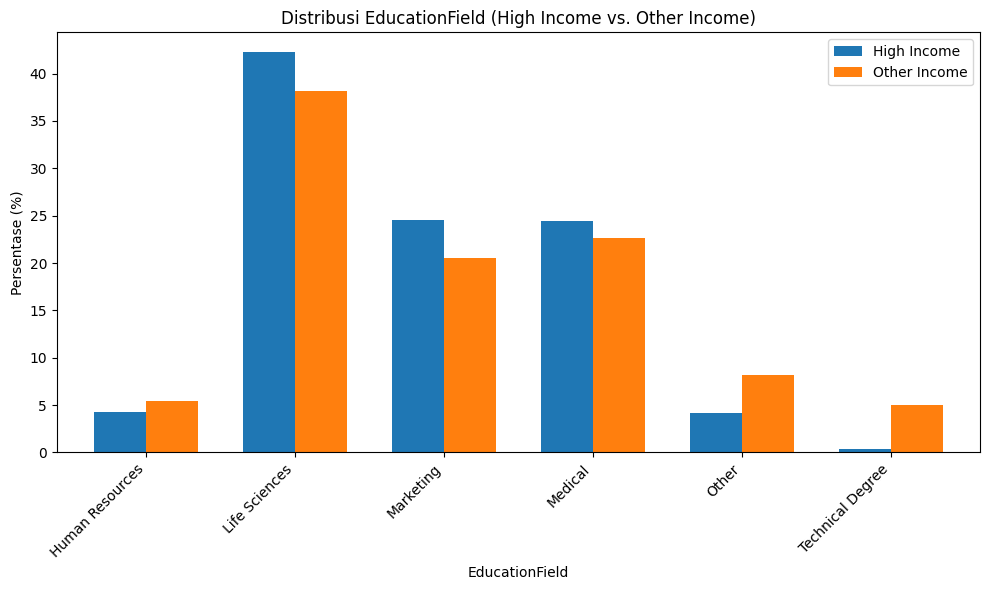


--- Kolom: EnvironmentSatisfaction ---
Karyawan Berpenghasilan Tinggi (%):
EnvironmentSatisfaction
High         35.59
Medium       26.16
Low          22.02
Very High    16.24
Name: proportion, dtype: float64

Karyawan Berpenghasilan Lainnya (%):
EnvironmentSatisfaction
High         34.60
Medium       29.16
Low          21.62
Very High    14.62
Name: proportion, dtype: float64


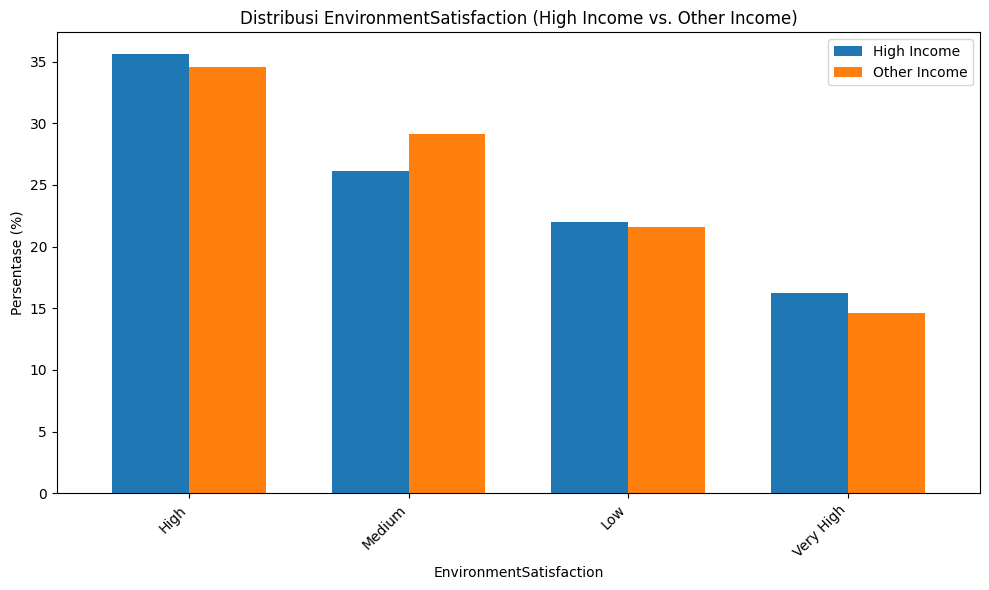


--- Kolom: Gender ---
Karyawan Berpenghasilan Tinggi (%):
Gender
Male      62.46
Female    37.54
Name: proportion, dtype: float64

Karyawan Berpenghasilan Lainnya (%):
Gender
Male      55.27
Female    44.73
Name: proportion, dtype: float64


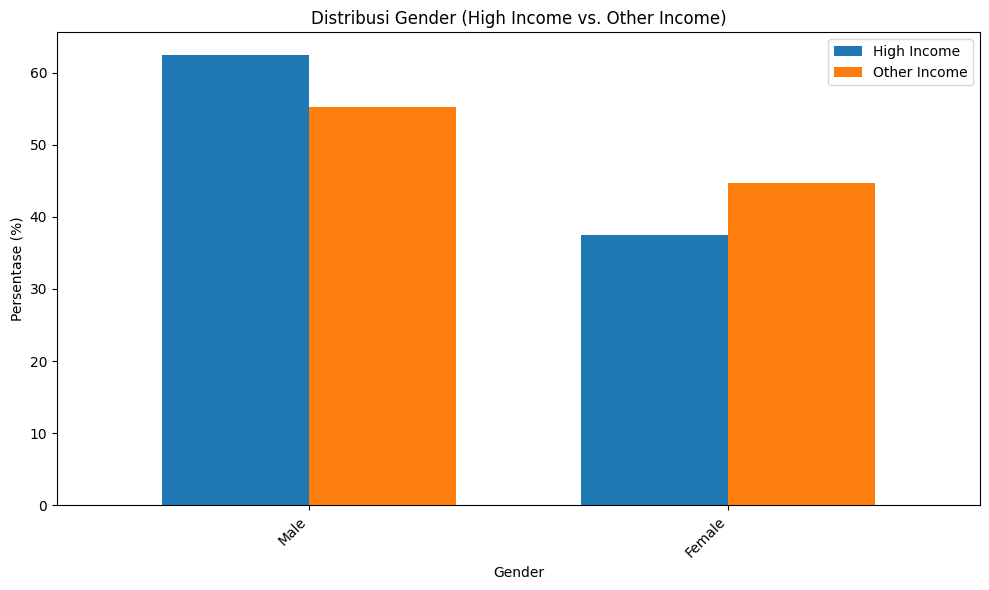


--- Kolom: JobInvolvement ---
Karyawan Berpenghasilan Tinggi (%):
JobInvolvement
High         52.52
Medium       36.40
Low           8.81
Very High     2.26
Name: proportion, dtype: float64

Karyawan Berpenghasilan Lainnya (%):
JobInvolvement
High         47.21
Medium       40.76
Low           7.70
Very High     4.33
Name: proportion, dtype: float64


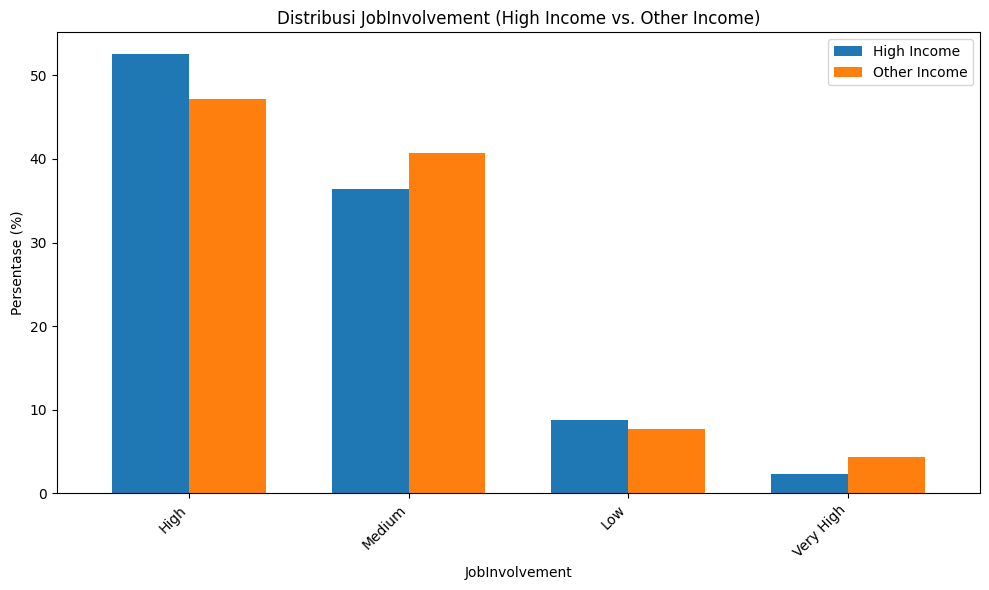


--- Kolom: JobRole ---
Karyawan Berpenghasilan Tinggi (%):
JobRole
Research Scientist           23.74
Sales Executive              19.16
Manufacturing Director       14.93
Laboratory Technician        12.60
Manager                      10.70
Research Director             8.59
Human Resources               4.63
Healthcare Representative     4.58
Sales Representative          1.06
Name: proportion, dtype: float64

Karyawan Berpenghasilan Lainnya (%):
JobRole
Research Scientist           17.82
Sales Executive              15.80
Laboratory Technician        15.64
Manufacturing Director       11.55
Research Director            10.77
Manager                      10.16
Healthcare Representative     7.40
Human Resources               6.52
Sales Representative          4.33
Name: proportion, dtype: float64


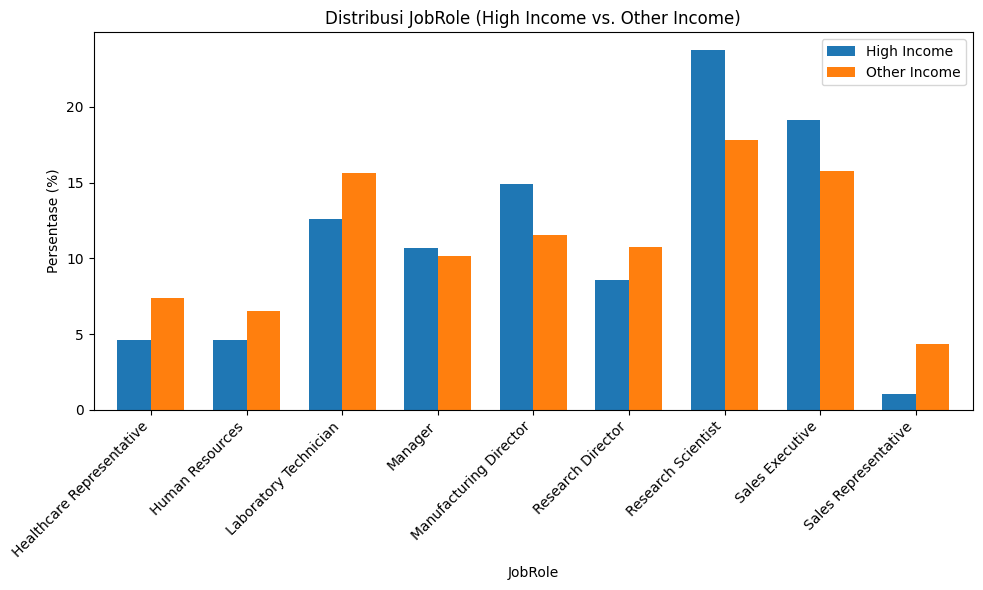


--- Kolom: JobSatisfaction ---
Karyawan Berpenghasilan Tinggi (%):
JobSatisfaction
High         37.58
Medium       31.68
Low          22.33
Very High     8.41
Name: proportion, dtype: float64

Karyawan Berpenghasilan Lainnya (%):
JobSatisfaction
High         34.15
Medium       27.42
Low          20.95
Very High    17.48
Name: proportion, dtype: float64


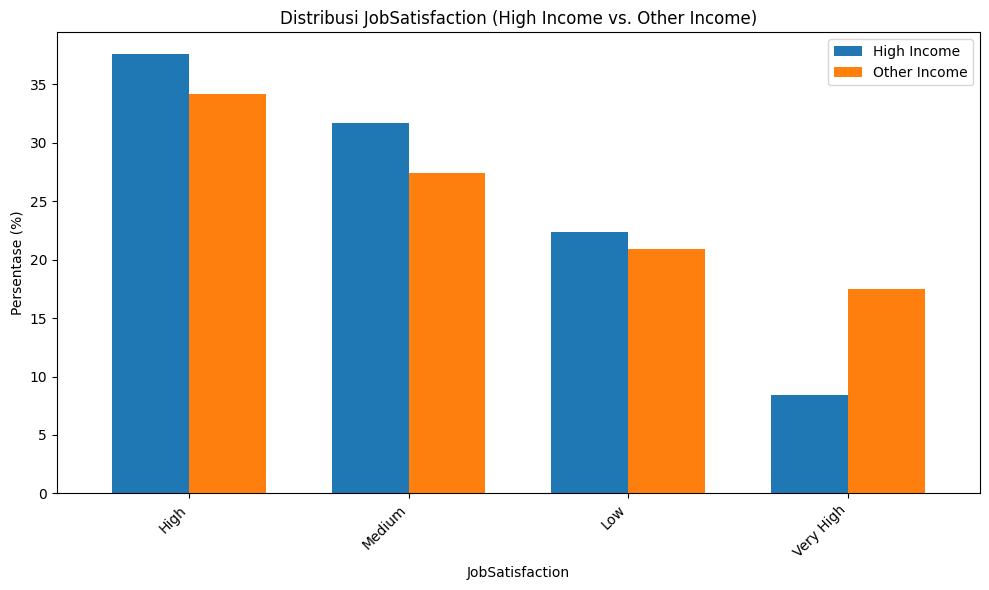


--- Kolom: MaritalStatus ---
Karyawan Berpenghasilan Tinggi (%):
MaritalStatus
Married     49.87
Divorced    25.64
Single      24.49
Name: proportion, dtype: float64

Karyawan Berpenghasilan Lainnya (%):
MaritalStatus
Married     51.23
Divorced    32.29
Single      16.48
Name: proportion, dtype: float64


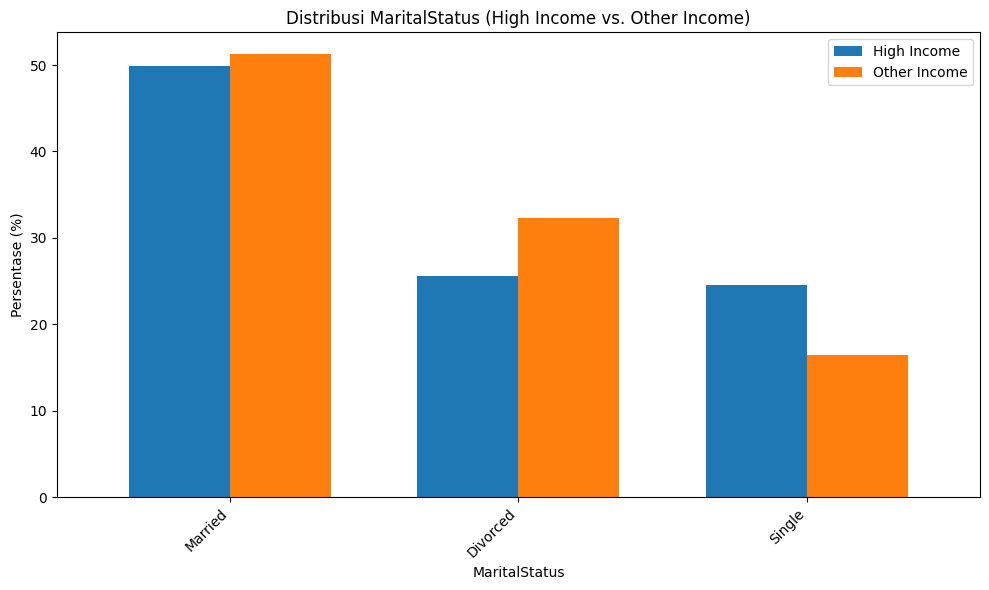


--- Kolom: OverTime ---
Karyawan Berpenghasilan Tinggi (%):
OverTime
No     83.17
Yes    16.83
Name: proportion, dtype: float64

Karyawan Berpenghasilan Lainnya (%):
OverTime
No     81.92
Yes    18.08
Name: proportion, dtype: float64


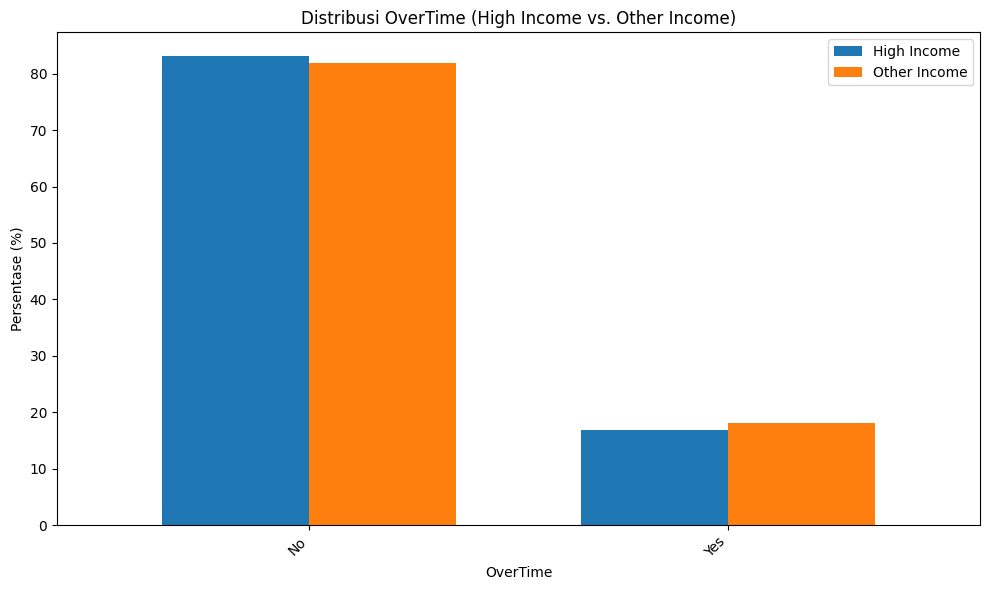


--- Kolom: PerformanceRating ---
Karyawan Berpenghasilan Tinggi (%):
PerformanceRating
Excellent      89.56
Outstanding     7.89
Good            2.56
Name: proportion, dtype: float64

Karyawan Berpenghasilan Lainnya (%):
PerformanceRating
Excellent      91.13
Outstanding     7.07
Good            1.81
Name: proportion, dtype: float64


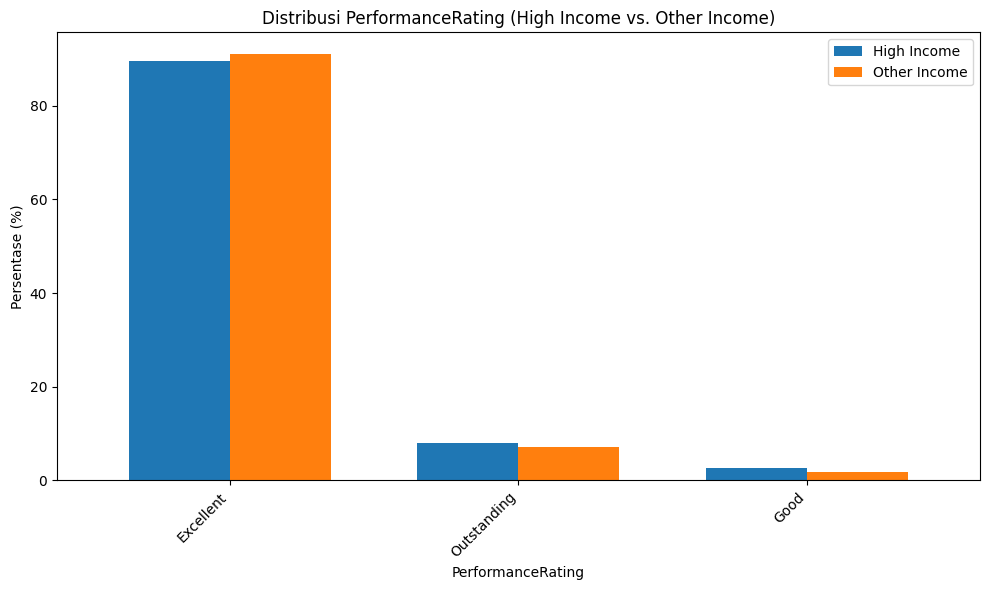


--- Kolom: RelationshipSatisfaction ---
Karyawan Berpenghasilan Tinggi (%):
RelationshipSatisfaction
High         35.34
Medium       30.40
Low          19.11
Very High    15.15
Name: proportion, dtype: float64

Karyawan Berpenghasilan Lainnya (%):
RelationshipSatisfaction
High         36.75
Medium       30.21
Low          20.01
Very High    13.03
Name: proportion, dtype: float64


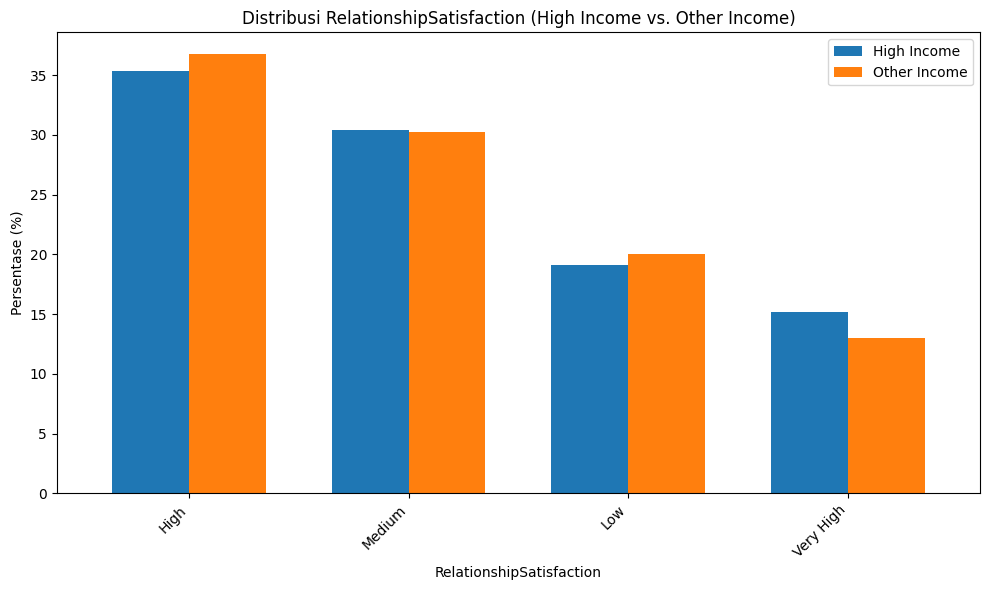


--- Kolom: WorkLifeBalance ---
Karyawan Berpenghasilan Tinggi (%):
WorkLifeBalance
Better    52.33
Good      39.18
Bad        5.91
Best       2.58
Name: proportion, dtype: float64

Karyawan Berpenghasilan Lainnya (%):
WorkLifeBalance
Better    53.37
Good      32.96
Bad        8.46
Best       5.22
Name: proportion, dtype: float64


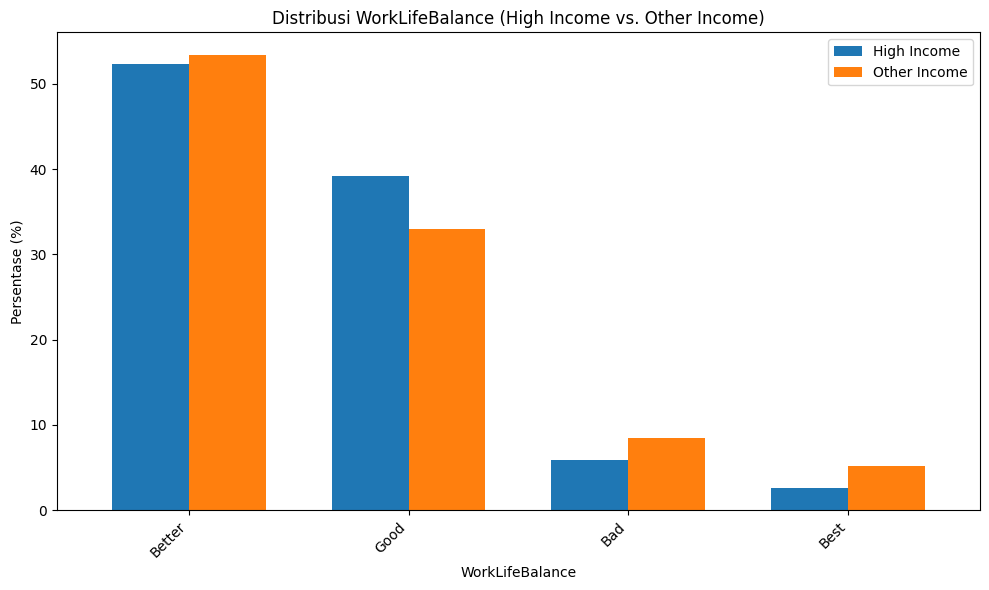


--- Kolom: Attrition ---
Karyawan Berpenghasilan Tinggi (%):
Attrition
No     86.61
Yes    13.39
Name: proportion, dtype: float64

Karyawan Berpenghasilan Lainnya (%):
Attrition
No     78.39
Yes    21.61
Name: proportion, dtype: float64


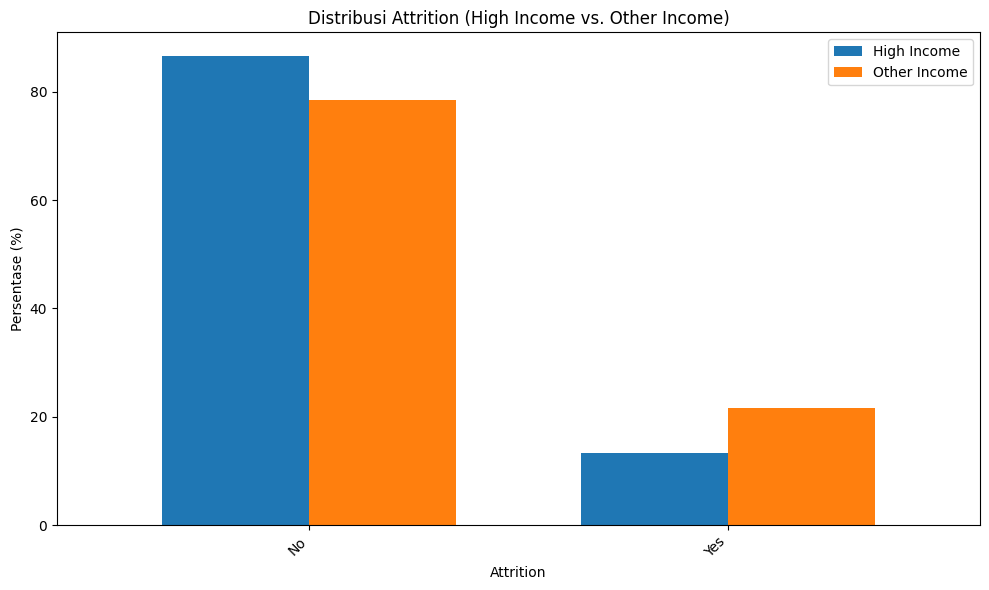

In [ ]:
print("PERBANDINGAN DISTRIBUSI FREKUENSI (FITUR KATEGORIKAL):")
for col in categorical_cols:
    print(f"\n--- Kolom: {col} ---")
    print("Karyawan Berpenghasilan Tinggi (%):")
    high_income_prop = high_income_df[col].value_counts(normalize=True).mul(100).round(2)
    print(high_income_prop)
    print("\nKaryawan Berpenghasilan Lainnya (%):")
    other_income_prop = other_income_df[col].value_counts(normalize=True).mul(100).round(2)
    print(other_income_prop)

    # Visualisasi perbandingan untuk fitur kategorikal kunci

    plt.figure(figsize=(10, 6))
    # Gabungkan data untuk plot perbandingan
    plot_df = pd.DataFrame({
        'High Income': high_income_prop,
        'Other Income': other_income_prop
    }).fillna(0) # Isi NaN dengan 0 jika kategori tidak ada di salah satu grup
    plot_df.plot(kind='bar', ax=plt.gca(), width=0.7)
    plt.title(f'Distribusi {col} (High Income vs. Other Income)')
    plt.ylabel('Persentase (%)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

Insight yang didapat dari perbandingan distribusi frekuensi pada fitur kategorikal:
- Mayoritas karyawan berpenghasilan tinggi (High Income) bekerja di departemen Research & Development, diikuti oleh Sales. Sedangkan pada proporsi pada departemen Human Resources lebih kecil pada kelompok berpenghasilan tinggi dibanding kelompok lainnya.
- Karyawan yang memiliki High Income cenderung memiliki tingkat pendidikan Bachelor, Master, dan Doctor yang proporsinya lebih tinggi dibanding kelompok berpendapatan rendah. Ini menunjukkan bahwa pendidikan yang lebih tinggi seringkali menjadi prasyarat untuk posisi bergaji tinggi.
- Bidang pendidikan seperti Life Sciences, Marketing, dan Medical merupakan bidang studi yang paling sering ditemukan pada karyawan berpenghasilan tinggi.
- Orang yang memiliki High Income cenderung memiliki kepuasan terhadap lingkungan kerja (EnvironmentSatisfaction) yang rendah, tinggi, dan bahkan sangat tinggi sehingga mengindikasikan lingkungan kerja yang baik menjadi faktor penting.
- Gender yang lebih sering memiliki High Income adalah laki-laki dibanding perempuan. Ini menunjukkan adanya ketidakseimbangan gender dalam distribusi pendapatan tinggi di dataset ini.
- JobInvolvement (keterlibatan pekerjaan) bagi karyawan High Income menunjukkan yang dominan High dan Low.
- JobRole yang seringkali mendapat High Income adalah Research Scientist, Sales Executive, Manufacturing Director, dan Manager.
- High Income lebih banyak didapatkan oleh kalangan single dibanding dengan kelompok pendapatan lain. Sebaliknya, kelompok menikah memiliki proporsi pendapatan high income yang sedikit lebih rendah dibanding kelompok pendapatan lain. Namun, kelompok bercerai memiliki proporsi yang jauh lebih sedikit bagi pendapatan high income.
- RelationshipSatisfaction (Kepuasan Hubungan) hanya bernilai Medium dan Very High untuk proporsi data dengan HighIncome yang lebih tinggi dibanding kelompok lain.
- Mayoritas karyawan berpenghasilan tinggi melaporkan work life balance (keseimbangan kehidupan kerja) yang dimiliki High Income hanya berkategori Good yang proporsinya lebih tinggi dibanding kelompok pendapatan lain. Sedangkan kelompok High Income pada Better, Bad, dan Best memiliki selisih yang tidak signifikan tetapi lebih rendah dari kelompok other income.
- Karyawan berpenghasilan tinggi cenderung untuk tidak ingin meninggalkan pekerjaan mereka yang terlihat dari nilai No pada Attrition yang tinggi dan nilai Yes pada Attrition yang rendah untuk kelompok High Income.

Ciri-ciri yang tidak berbeda signifikan:
- High Income sedikit lebih tinggi untuk Travel_Rarely (jarang melakukan perjalanan) atau bahkan bukan orang yang suka melakukan perjalanan (Non-Travel).
- Distribusi overtime hanya sedikit lebih tinggi proporsi high income pada kategori No untuk melakukan kerja lembur.
- Distribusi performance rating hanya sedikit lebih tinggi proporsi high income pada kategori outstanding dan good.
- Job Satisfaction bagi orang yang memiliki High Income lebih kecil persentasenya dibanding Other Income untuk kategori Very High. Sedangkan sebaliknya High, Medium, dan Low memiliki persentase lebih tinggi bagi orang-orang yang memiliki High Income.

### Korelasi

In [ ]:
print("\n--- ANALISIS KORELASI PADA SELURUH DATASET ---")
# Seleksi hanya fitur numerik untuk perhitungan korelasi
# Pastikan hanya kolom yang ada di numerical_cols
numeric_df_for_corr = df_eda[numerical_cols].select_dtypes(include=[np.number])


--- ANALISIS KORELASI PADA SELURUH DATASET ---


In [ ]:
# Implementasi korelasi Pearson hanya untuk fitur numerik
print("\nMATRIKS KORELASI PEARSON:")
correlation_matrix_pearson = numeric_df_for_corr.corr(method='pearson')
correlation_matrix_pearson


MATRIKS KORELASI PEARSON:


,Age,DistanceFromHome,JobLevel,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MonthlyIncome
Age,1.000000,0.017978,0.518436,0.258927,-0.043837,NaN,0.076189,0.696964,0.022875,0.369113,0.281321,0.258336,0.254567,0.017090
DistanceFromHome,0.017978,1.000000,0.050288,-0.044644,0.008046,NaN,0.029534,0.015785,-0.049552,0.031198,0.032841,0.039962,0.017897,0.065475
JobLevel,0.518436,0.050288,1.000000,0.125521,-0.030349,NaN,0.076678,0.751601,0.017930,0.554647,0.445727,0.377447,0.413049,0.052360
NumCompaniesWorked,0.258927,-0.044644,0.125521,1.000000,0.035617,NaN,0.010684,0.204901,-0.026270,-0.086764,-0.070301,-0.023666,-0.081605,-0.049817
PercentSalaryHike,-0.043837,0.008046,-0.030349,0.035617,1.000000,NaN,-0.037771,-0.059815,-0.015402,-0.048214,-0.011901,-0.017791,-0.032223,0.025721
StandardHours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockOptionLevel,0.076189,0.029534,0.076678,0.010684,-0.037771,NaN,1.000000,0.058349,0.054273,0.043916,0.065542,0.024072,0.049273,-0.163042
TotalWorkingYears,0.696964,0.015785,0.751601,0.204901,-0.059815,NaN,0.058349,1.000000,0.045861,0.649288,0.511243,0.425390,0.486912,-0.019972
TrainingTimesLastYear,0.022875,-0.049552,0.017930,-0.026270,-0.015402,NaN,0.054273,0.045861,1.000000,-0.001258,-0.019256,-0.013006,-0.012324,-0.149494
YearsAtCompany,0.369113,0.031198,0.554647,-0.086764,-0.048214,NaN,0.043916,0.649288,-0.001258,1.000000,0.780864,0.640535,0.786428,0.039510


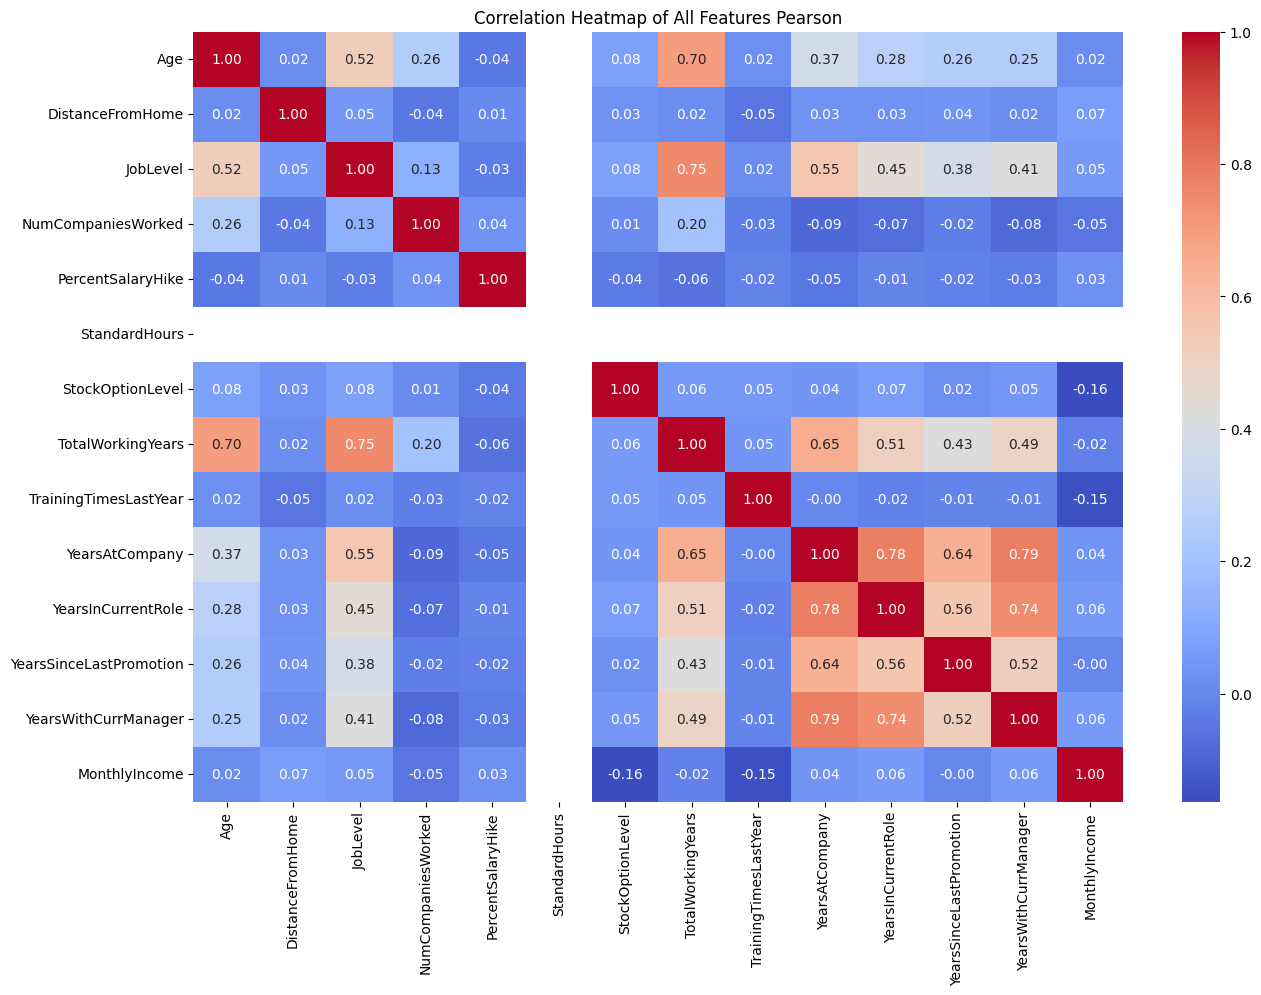

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix_pearson, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of All Features Pearson')
plt.show()

In [ ]:
print("\nMATRIKS KORELASI SPEARMAN:")
correlation_matrix_spearman = numeric_df_for_corr.corr(method='spearman')
correlation_matrix_spearman


MATRIKS KORELASI SPEARMAN:


,Age,DistanceFromHome,JobLevel,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MonthlyIncome
Age,1.000000,-0.009601,0.493684,0.305655,-0.023456,NaN,0.102575,0.674185,0.029779,0.337926,0.276905,0.229800,0.252895,-0.032762
DistanceFromHome,-0.009601,1.000000,0.055744,-0.019156,0.018389,NaN,0.017416,0.005473,-0.048176,0.025615,0.020184,0.031558,-0.000680,0.086838
JobLevel,0.493684,0.055744,1.000000,0.163647,-0.034151,NaN,0.103368,0.717779,0.011191,0.509490,0.446025,0.311103,0.407102,0.066399
NumCompaniesWorked,0.305655,-0.019156,0.163647,1.000000,0.003058,NaN,0.009636,0.288691,-0.014955,-0.090888,-0.064702,-0.029813,-0.079748,0.000714
PercentSalaryHike,-0.023456,0.018389,-0.034151,0.003058,1.000000,NaN,-0.032068,-0.057438,-0.016864,-0.063449,-0.032543,-0.033778,-0.042625,0.093503
StandardHours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockOptionLevel,0.102575,0.017416,0.103368,0.009636,-0.032068,NaN,1.000000,0.092372,0.037576,0.076847,0.069332,0.023047,0.069283,-0.189859
TotalWorkingYears,0.674185,0.005473,0.717779,0.288691,-0.057438,NaN,0.092372,1.000000,0.034459,0.649173,0.557863,0.377417,0.538736,-0.005541
TrainingTimesLastYear,0.029779,-0.048176,0.011191,-0.014955,-0.016864,NaN,0.037576,0.034459,1.000000,-0.002302,-0.017146,-0.011533,-0.011755,-0.092406
YearsAtCompany,0.337926,0.025615,0.509490,-0.090888,-0.063449,NaN,0.076847,0.649173,-0.002302,1.000000,0.866030,0.546526,0.854113,0.023188


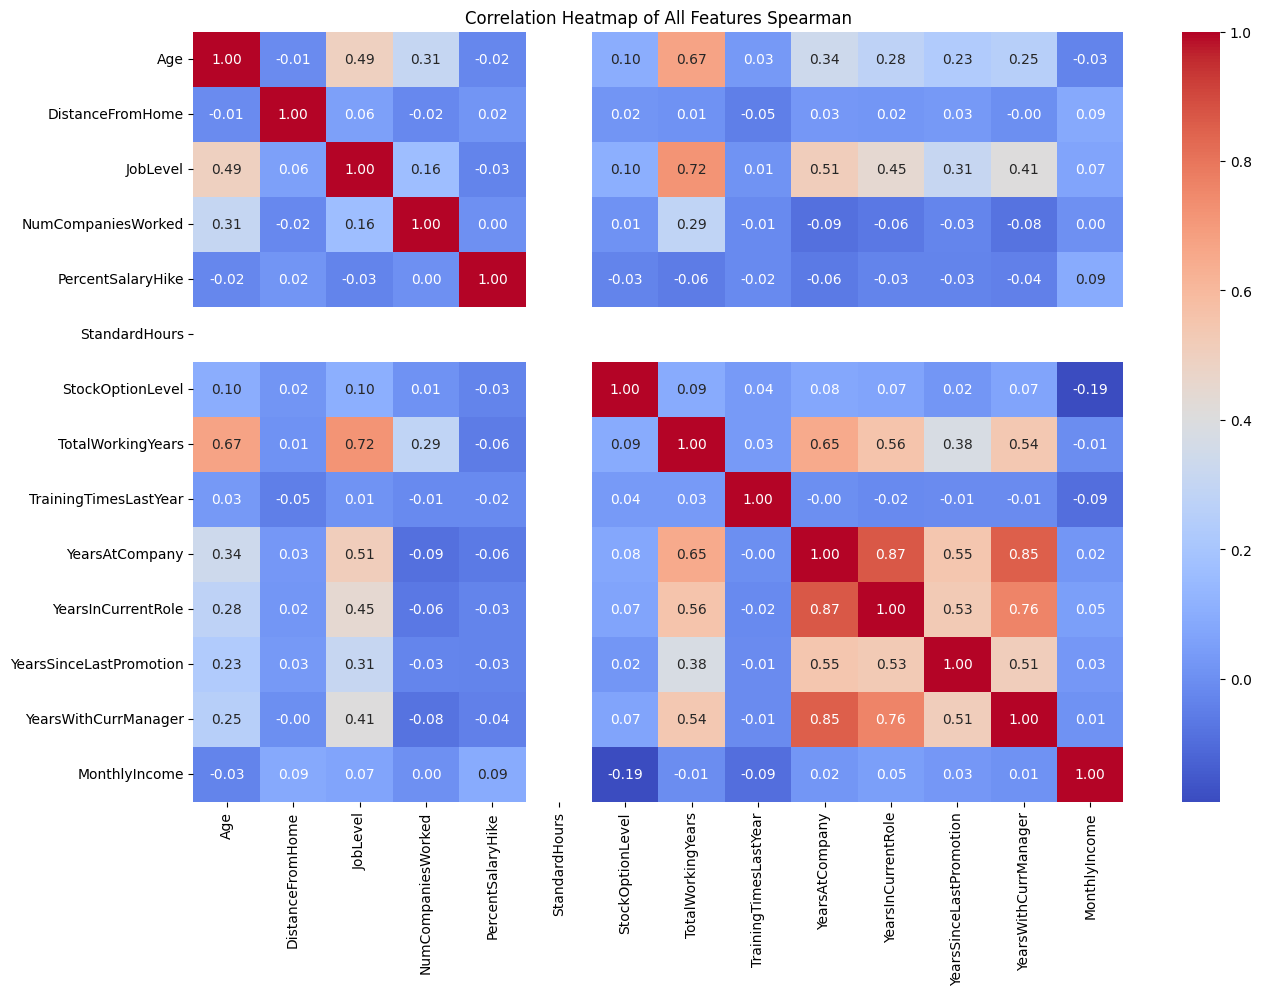

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix_spearman, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of All Features Spearman')
plt.show()

Korelasi positif dengan MonthlyIncome:
- DistanceFromHome memiliki korelasi positif kuat dengan MonthlyIncome (Pearson: 0.065475, Spearman: 0.086838).
- JobLevel memiliki korelasi positif kuat dengan MonthlyIncome (Pearson: 0.052360, Spearman: 0.066399). Hal ini mengonfirmasi temuan dari analisis distribusi bahwa JobLevel merupakan salah satu faktor utama pendapatan karyawan.
- PercentSalaryHike memiliki korelasi positif dengan MonthlyIncome (Pearson: 0.025721, Spearman: 0.093503).
- YearsWithCurrManager memiliki korelasi positif lemah dengan MonthlyIncome (Pearson: 0.056531, Spearman: 0.007328).
- YearsInCurrentRole memiliki korelasi positif lemah dengan MonthlyIncome (Pearson: 0.055125, Spearman: 0.048092).
- YearsAtCompany memiliki korelasi positif lemah dengan MonthlyIncome (Pearson: 0.039510, Spearman: 0.023188).
- YearsWithCurrManager, YearsInCurrentRole, dan YearsAtCompany menunjukkan bahwa stabilitas dan pengalaman di posisi dan manajer saat ini sedikit berkontribusi pada pendapatan.

Korelasi negatif dengan MonthlyIncome:
- StockOptionLevel memiliki korelasi negatif yang cukup signifikan kuat dengan MonthlyIncome (Pearson: -0.163042, Spearman: -0.189859). Hal ini menarik karena seperti yang ditunjukkan pada bar chart sebelumnya bahwa karyawana dengan StockOptionLevel yang lebih rendah justry memiliki MonthlyIncome yang lebih tinggi.
- TrainingTimesLastYear memiliki korelasi negatif yang lemah dengan MonthlyIncome (Pearson: -0.149494, Spearman: -0.092406). Hal ini bisa diinterpretasikan bahwa karyawan yang sering mengikuti pelatihan mungkin berada di fase awal karir atau di posisi yang membutuhkan lebih banyak pengembangan, sedangkan karyawan dengan pendapatan tinggi mungkin sudah mapan dan tidak memerlukan banyak pelatihan formal.

Karyawan yang memiliki pendapatan tinggi cenderung memiliki karakteristik sebagai berikut.
-	JobLevel yang tinggi (2, 4, 5)
-	Pendidikan tinggi (Bachelor, Master, atau Doctor)
-	Persentase kenaikan gaji (PercentSalaryHike) yang lebih tinggi
-	Bidang studi (EducationField) umumnya Life Sciences, Marketing, atau Medical
-	Umumnya bekerja di departemen Research & Development (R&D) atau Sales
-	Cenderung tidak ingin meninggalkan perusahaan (Attrition ‘No’ tinggi)
-	Jarak tempuh dari rumah ke kantor yang lebih jauh
-	Opsi saham rendah (StockOptionLevel 0)
-	Kepuasan lingkungan kerja (EnvironmentSatisfaction) cenderung tinggi atau sangat tinggi, walaupun WorkLifeBalance dominan pada kategori Good

## 4. Apakah karyawan yang memiliki jumlah pelatihan di atas rata-rata cenderung memiliki tingkat pengunduran diri yang lebih tinggi? - (Fikri Budianto - 2206025306)

Average TrainingTimesLastYear: 2.49


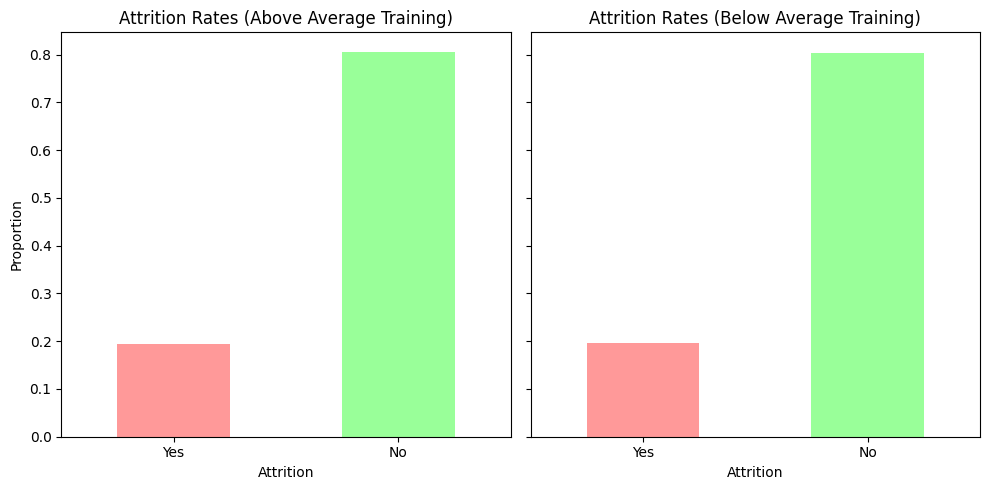


Attrition Rates (Above Average):
Yes    0.193899
No     0.806101
dtype: float64

Attrition Rates (Below Average):
Yes    0.196737
No     0.803263
dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average TrainingTimesLastYear
avg_training = df['TrainingTimesLastYear'].mean()
print(f"Average TrainingTimesLastYear: {avg_training:.2f}")

# Split data into above and below average training
df_above_avg = df[df['TrainingTimesLastYear'] > avg_training]
df_below_avg = df[df['TrainingTimesLastYear'] <= avg_training]

# Calculate the proportion of Attrition Yes and No for each group
def calculate_attrition_rates(df_group):
    yes_rate = df_group['Attrition'].value_counts(normalize=True).get('Yes', 0)
    no_rate = df_group['Attrition'].value_counts(normalize=True).get('No', 0)
    return pd.Series({'Yes': yes_rate, 'No': no_rate})

attrition_above = calculate_attrition_rates(df_above_avg)
attrition_below = calculate_attrition_rates(df_below_avg)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# Plot for Above Average
attrition_above.plot(kind='bar', ax=ax1, color=['#FF9999', '#99FF99'])
ax1.set_title('Attrition Rates (Above Average Training)')
ax1.set_xlabel('Attrition')
ax1.set_ylabel('Proportion')
ax1.set_xticklabels(attrition_above.index, rotation=0)

# Plot for Below Average
attrition_below.plot(kind='bar', ax=ax2, color=['#FF9999', '#99FF99'])
ax2.set_title('Attrition Rates (Below Average Training)')
ax2.set_xlabel('Attrition')
ax2.set_xticklabels(attrition_below.index, rotation=0)

# Adjust layout
plt.tight_layout()
plt.show()

# Print the rates for reference
print("\nAttrition Rates (Above Average):")
print(attrition_above)
print("\nAttrition Rates (Below Average):")
print(attrition_below)

Terlihat bahwa karyawan dengan jumlah pelatihan di atas rata-rata yang mengundurkan diri proporsinya tidak jauh berbeda dibandingkan karyawan dengan jumlah pelatihan di bawa rata-rata yang mengundurkan diri. Hal ini menunjukkan bahwa dugaan karyawan dengan tingkat pelatihan lebih tinggi memiliki tingkat pengunduran diri yang lebih tinggi tidak benar.

## 5. Apakah Work-Life Balance yang baik berkorelasi dengan tingkat kepuasan kerja yang tinggi? (Fikri Budianto - 2206025306)

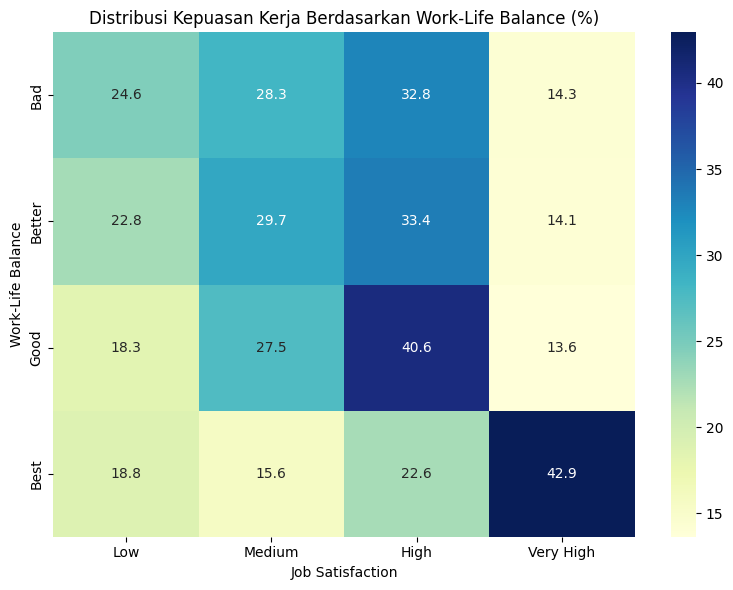

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Salin data untuk keperluan visualisasi
df_viz = df.copy()

# Pastikan kolom berupa kategorikal berurutan
wlb_order = ['Bad', 'Better', 'Good', 'Best']
satisfaction_order = ['Low', 'Medium', 'High', 'Very High']

# Hitung jumlah karyawan dalam setiap kombinasi WLB dan JobSatisfaction
heatmap_data = pd.crosstab(df_viz['WorkLifeBalance'], df_viz['JobSatisfaction'], normalize='index') * 100

# Urutkan
heatmap_data = heatmap_data.loc[wlb_order, satisfaction_order]

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".1f")
plt.title('Distribusi Kepuasan Kerja Berdasarkan Work-Life Balance (%)')
plt.xlabel('Job Satisfaction')
plt.ylabel('Work-Life Balance')
plt.tight_layout()
plt.show()

<ipython-input-25-9b7b8b202cc5>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_satisfaction.index, y=avg_satisfaction.values, palette='Blues_d')


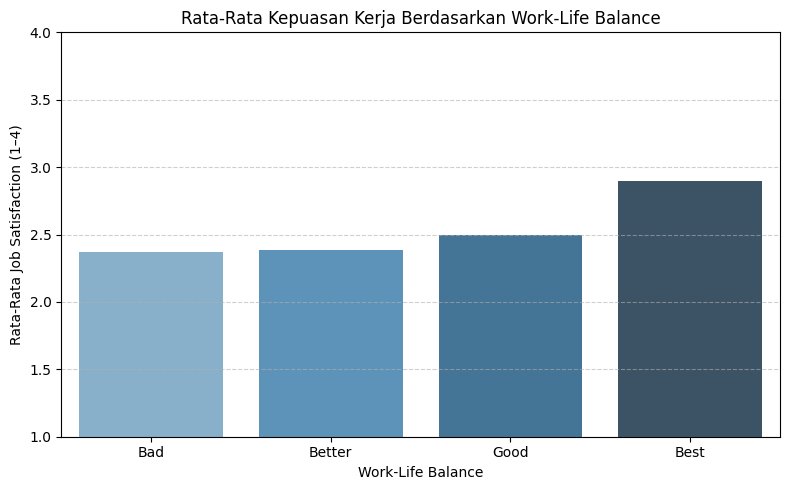

In [ ]:
# Buat mapping angka untuk tingkat kepuasan kerja
satisfaction_mapping = {
    'Low': 1,
    'Medium': 2,
    'High': 3,
    'Very High': 4
}
df_viz['JobSatisfactionNum'] = df_viz['JobSatisfaction'].map(satisfaction_mapping)

# Hitung rata-rata Job Satisfaction per Work-Life Balance
avg_satisfaction = df_viz.groupby('WorkLifeBalance')['JobSatisfactionNum'].mean().reindex(wlb_order)

# Plot bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_satisfaction.index, y=avg_satisfaction.values, palette='Blues_d')
plt.title('Rata-Rata Kepuasan Kerja Berdasarkan Work-Life Balance')
plt.xlabel('Work-Life Balance')
plt.ylabel('Rata-Rata Job Satisfaction (1–4)')
plt.ylim(1, 4)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Berdasarkan heatmap, terlihat bahwa semakin tinggi work-life balance seseorang maka semakin tinggi juga tingkat kepuasan kerjanya. Selain itu, berdasarkan bar plot, semakin tinggi work-life balance maka nilai rata-rata kepuasan kerjanya juga meningkat. Kedua visualisasi ini menunjukkan bahwa work-life balance yang baik berkorelasi dengan tingkat kepuasan kerja.

## 6. Apakah kepuasan terhadap lingkungan kerja berpengaruh terhadap kemungkinan karyawan bertahan (Attrition)? (Gilang Fajar Pratama - 2206082631)


Tipe data dari kolom 'EnvironmentSatisfaction' dan 'Attrition':
EnvironmentSatisfaction    object
Attrition                  object
dtype: object

Tabel Kontingensi (EnvironmentSatisfaction vs Attrition):
Attrition                  No  Yes
EnvironmentSatisfaction           
Very High                 900  215
High                     2085  501
Medium                   1709  400
Low                      1272  340




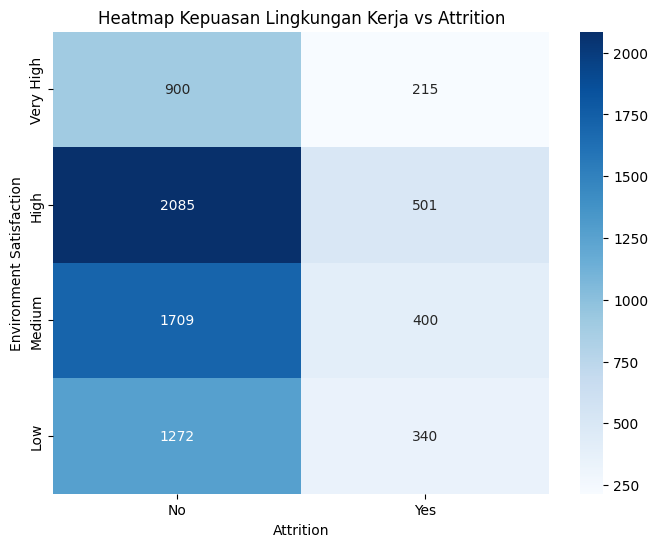

In [ ]:
df_6 = df.copy()
# Cek tipe data dari kolom lingkungan kerja dan Attrition
print("\nTipe data dari kolom 'EnvironmentSatisfaction' dan 'Attrition':")
print(df_6[['EnvironmentSatisfaction', 'Attrition']].dtypes)
# 1. Buat Tabel Kontingensi
# Kolom yang digunakan adalah 'EnvironmentSatisfaction' dan 'Attrition'
# Urutkan kolom EnvironmentSatisfaction dari Low, Medium, High, Very High
contingency_table = pd.crosstab(df['EnvironmentSatisfaction'], df_6['Attrition'])
# Define the desired order for EnvironmentSatisfaction
satisfaction_order = ['Very High', 'High', 'Medium', 'Low']
contingency_table = contingency_table.reindex(satisfaction_order)

print("\nTabel Kontingensi (EnvironmentSatisfaction vs Attrition):")
print(contingency_table)
print("\n")

# 2. Visualisasi dengan Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="Blues")
plt.title('Heatmap Kepuasan Lingkungan Kerja vs Attrition')
plt.ylabel('Environment Satisfaction')
plt.xlabel('Attrition')
plt.show()

Terdapat pengaruh bahwa semakin tinggi level kepuasan lingkungan kerja, maka karyawan akan tetap bertahan. Akan tetapi, pengaruh ini hanya sampai pada level kepuasan lingkungan kerja “High”.
